In [293]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from joblib import dump
import pickle
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb
from statsmodels.stats.diagnostic import het_white
import warnings
import json
warnings.filterwarnings("ignore")
scaler = StandardScaler()

In [294]:
data = pd.read_csv("gym_members_exercise_tracking.csv")
data

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male         88.3        1.71      180      157           60   
1     46  Female         74.9        1.53      179      151           66   
2     32  Female         68.1        1.66      167      122           54   
3     25    Male         53.2        1.70      190      164           56   
4     38    Male         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24    Male         87.1        1.74      187      158           67   
969   25    Male         66.6        1.61      184      166           56   
970   59  Female         60.4        1.76      194      120           53   
971   32    Male        126.4        1.83      198      146           62   
972   46    Male         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                        1.69           1313.0         Yoga            12.6   
1                        1.30            883.0         HIIT            33.9   
2                        1.11            677.0       Cardio            33.4   
3                        0.59            532.0     Strength            28.8   
4                        0.64            556.0     Strength            29.2   
..                        ...              ...          ...             ...   
968                      1.57           1364.0     Strength            10.0   
969                      1.38           1260.0     Strength            25.0   
970                      1.72            929.0       Cardio            18.8   
971                      1.10            883.0         HIIT            28.2   
972                      0.75            542.0     Strength            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [295]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [296]:
data.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

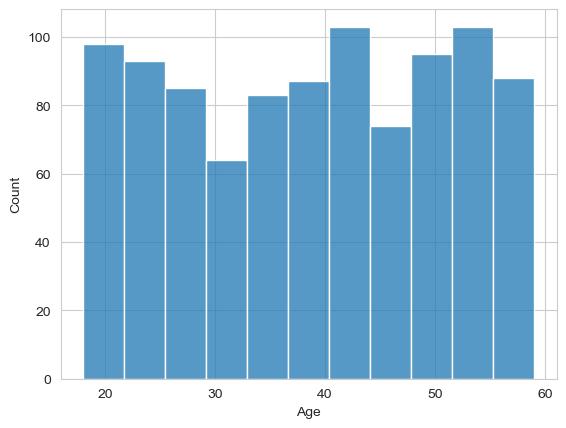

In [297]:
sns.histplot(data, x = "Age")
plt.show()

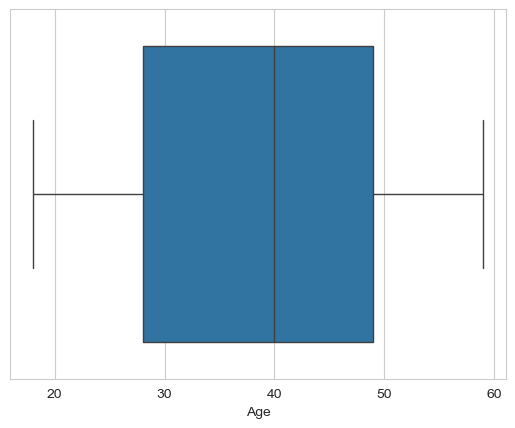

In [298]:
sns.boxplot(data, x = "Age")
plt.show()

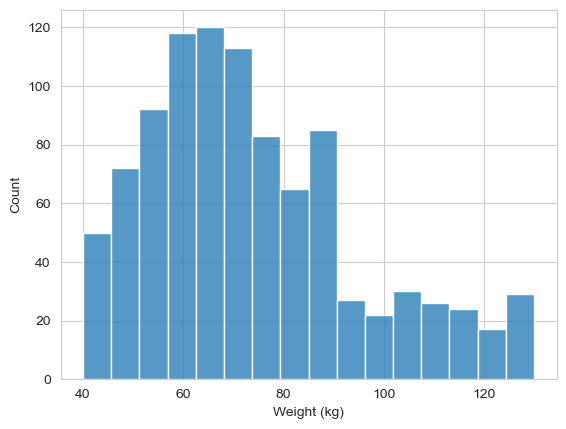

In [299]:
sns.histplot(data, x = "Weight (kg)")
plt.show()

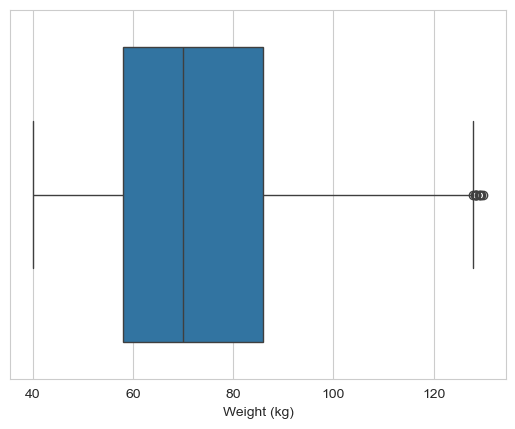

In [300]:
sns.boxplot(data, x = "Weight (kg)")
plt.show()

In [301]:
data[data["Weight (kg)"] > 129] 

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
122   56   Male        129.5        1.95      160      129           66   
593   55   Male        129.9        1.73      187      155           60   
854   48   Male        129.2        1.61      193      167           62   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
122                      1.00            639.0     Strength            25.2   
593                      0.69            529.0         Yoga            21.7   
854                      1.06            876.0         Yoga            21.4   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
122                    3.5                              2                 1   
593                    3.1                              3                 1   
854                    2.9                              4                 2   

       BMI  
122  34.06  
593  43.40  
854  49.84

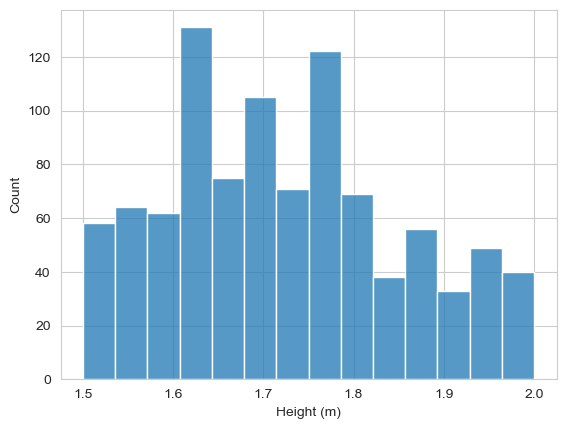

In [302]:
sns.histplot(data, x = "Height (m)")
plt.show()

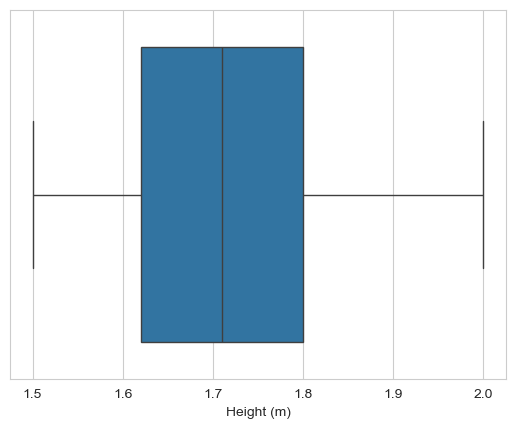

In [303]:
sns.boxplot(data, x = "Height (m)")
plt.show()

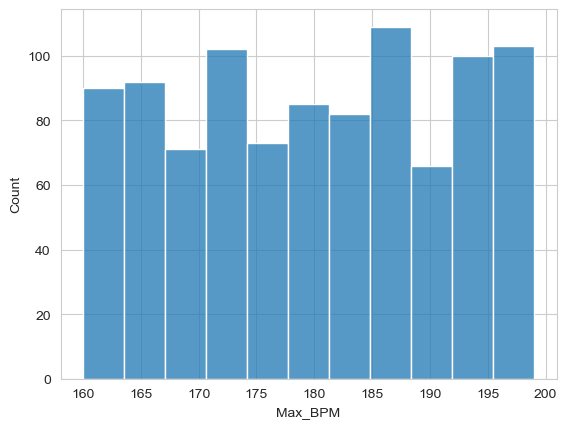

In [304]:
sns.histplot(data, x = "Max_BPM")
plt.show()

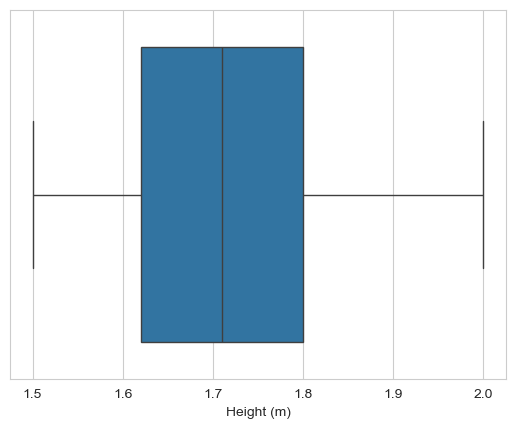

In [305]:
sns.boxplot(data, x = "Height (m)")
plt.show()

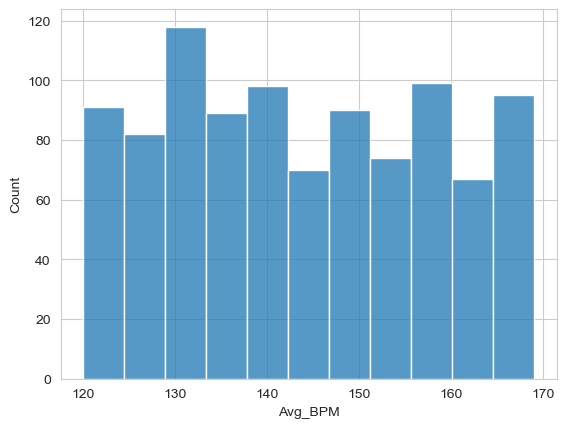

In [306]:
sns.histplot(data, x = "Avg_BPM")
plt.show()

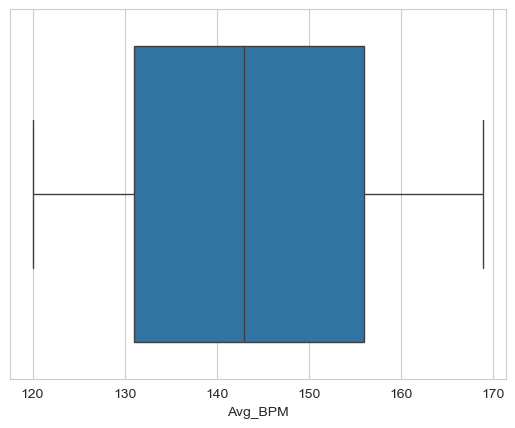

In [307]:
sns.boxplot(data, x = "Avg_BPM")
plt.show()

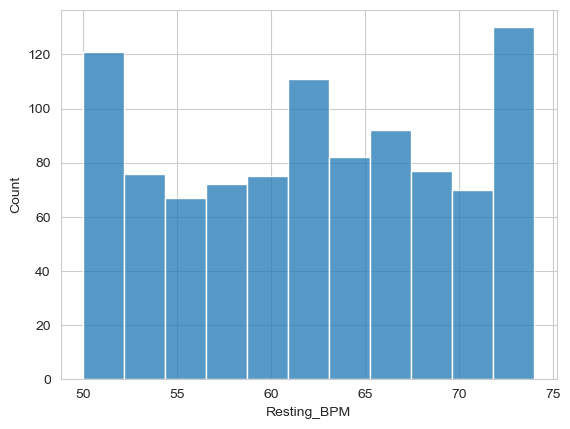

In [308]:
sns.histplot(data, x = "Resting_BPM")
plt.show()

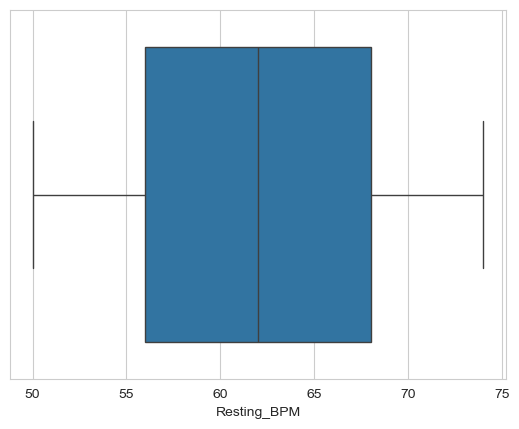

In [309]:
sns.boxplot(data, x = "Resting_BPM")
plt.show()

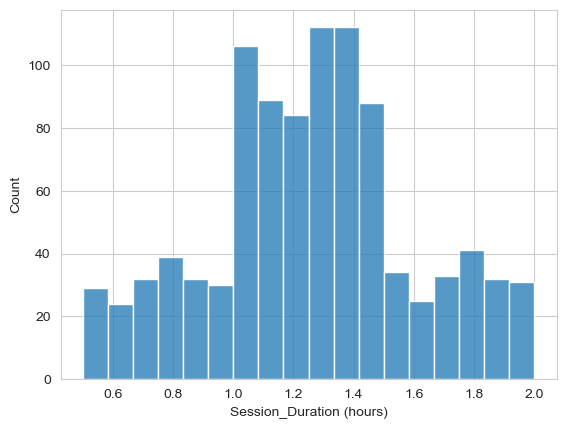

In [310]:
sns.histplot(data, x = "Session_Duration (hours)")
plt.show()

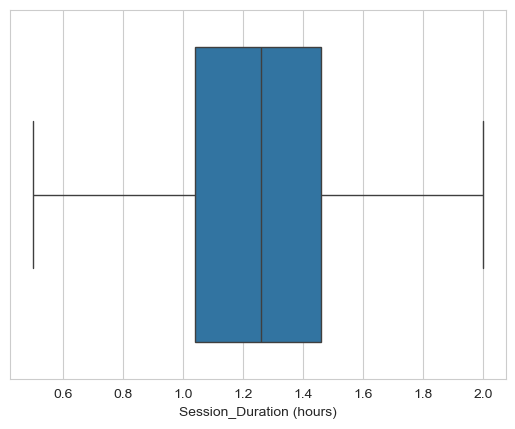

In [311]:
sns.boxplot(data, x = "Session_Duration (hours)")
plt.show()

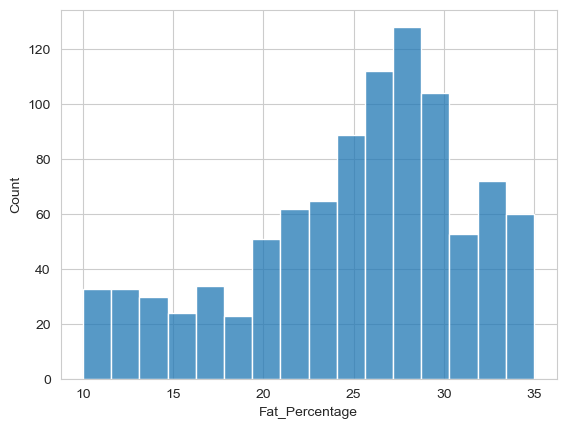

In [312]:
sns.histplot(data, x = "Fat_Percentage")
plt.show()

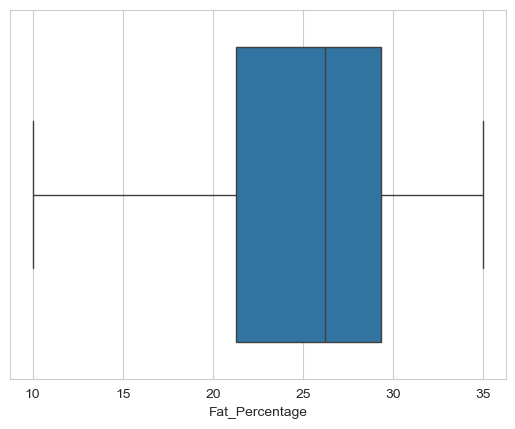

In [313]:
sns.boxplot(data, x = "Fat_Percentage")
plt.show()

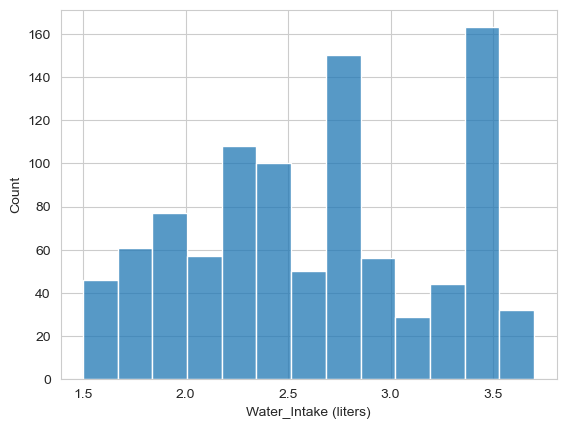

In [314]:
sns.histplot(data, x = "Water_Intake (liters)")
plt.show()

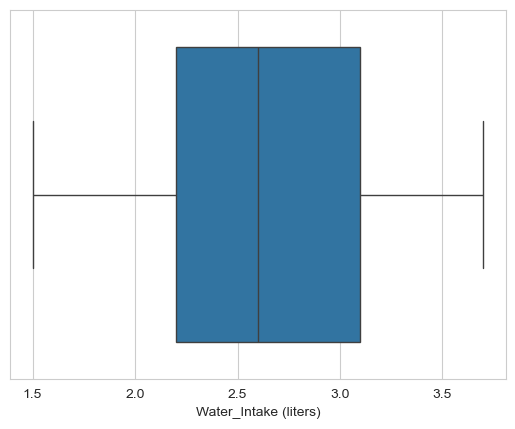

In [315]:
sns.boxplot(data, x = "Water_Intake (liters)")
plt.show()

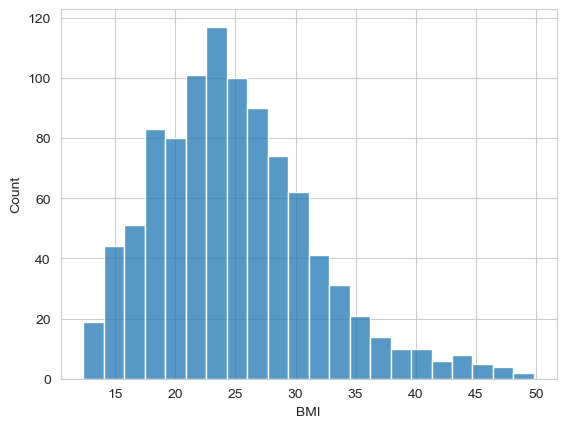

In [316]:
sns.histplot(data, x = "BMI")
plt.show()

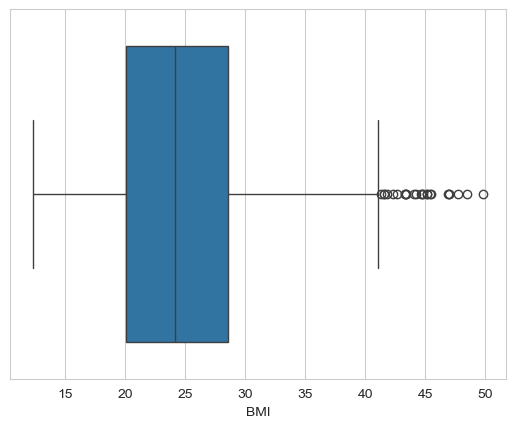

In [317]:
sns.boxplot(data, x = "BMI")
plt.show()

In [318]:
data[data["BMI"] > 42]

Age Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
10    41   Male        120.8        1.67      188      146           54   
12    57   Male        112.5        1.61      195      165           61   
35    26   Male        127.6        1.73      167      160           62   
55    23   Male        114.8        1.60      182      163           60   
133   21   Male        125.2        1.66      196      159           60   
251   33   Male        117.0        1.61      166      130           55   
261   57   Male        126.8        1.63      161      133           73   
291   55   Male        128.4        1.68      178      165           52   
302   36   Male        123.7        1.69      185      138           73   
345   43   Male        127.7        1.69      171      155           53   
470   34   Male        124.6        1.63      161      136           66   
524   36   Male        112.4        1.63      164      135           58   
593   55   Male        129.9        1.73      187      155           60   
687   18   Male        125.9        1.67      172      153           60   
710   38   Male        123.3        1.62      161      165           65   
833   59   Male        126.4        1.69      168      149           68   
854   48   Male        129.2        1.61      193      167           62   
868   47   Male        127.8        1.65      198      157           60   
924   18   Male        118.6        1.64      188      134           67   
936   54   Male        117.2        1.62      172      143           56   
945   35   Male        127.1        1.62      187      128           69   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
10                       0.82            593.0         HIIT            20.5   
12                       1.24           1013.0       Cardio            22.1   
35                       1.32           1162.0     Strength            27.3   
55                       1.47           1318.0       Cardio            21.7   
133                      1.38           1207.0         HIIT            29.8   
251                      1.04            744.0         HIIT            25.1   
261                      0.96            632.0         Yoga            20.8   
291                      1.13            923.0       Cardio            20.4   
302                      1.30            987.0       Cardio            20.4   
345                      1.14            875.0       Cardio            24.1   
470                      1.41           1055.0         HIIT            27.6   
524                      1.02            757.0       Cardio            25.0   
593                      0.69            529.0         Yoga            21.7   
687                      1.46           1229.0         Yoga            20.6   
710                      1.34           1216.0         Yoga            21.2   
833                      1.24            915.0     Strength            29.5   
854                      1.06            876.0         Yoga            21.4   
868                      0.77            598.0       Cardio            28.7   
924                      0.94            693.0       Cardio            25.6   
936                      1.04            736.0         HIIT            23.1   
945                      1.02            718.0     Strength            23.3   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
10                     3.0                              2                 1   
12                     2.7                              3                 2   
35                     2.9                              3                 1   
55                     2.7                              4                 2   
133                    3.4                              3                 2   
251                    2.4                              3                 2   
261                    2.1                              2     

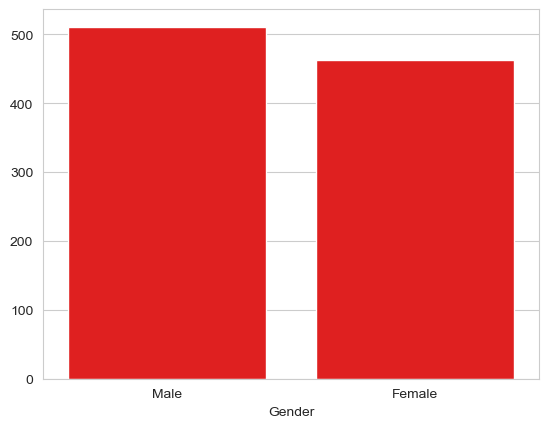

In [319]:
sns.barplot(x=data["Gender"].value_counts().index, 
            y=data["Gender"].value_counts().values, 
            color="red")
plt.show()

In [320]:
male = data[data["Gender"] == "Male"]
female = data[data["Gender"] == "Female"]

In [321]:
male.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  511.000000   511.000000  511.000000  511.000000  511.000000   
mean    38.998043    85.531115    1.793405  179.996086  143.898239   
std     12.045258    21.788629    0.117081   11.678873   14.300193   
min     18.000000    45.000000    1.600000  160.000000  120.000000   
25%     29.000000    69.750000    1.690000  170.000000  132.000000   
50%     40.000000    85.300000    1.790000  180.000000  143.000000   
75%     49.000000   101.600000    1.890000  189.000000  157.000000   
max     59.000000   129.900000    2.000000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   511.000000                511.000000       511.000000      511.000000   
mean     62.320939                  1.252446       944.455969       22.553816   
std       7.403943                  0.344297       286.590987        5.729882   
min      50.000000                  0.510000       331.000000       10.000000   
25%      56.000000                  1.040000       742.000000       20.700000   
50%      63.000000                  1.270000       937.000000       23.800000   
75%      68.500000                  1.450000      1138.500000       27.200000   
max      74.000000                  2.000000      1783.000000       30.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             511.000000                     511.000000        511.000000   
mean                3.007436                       3.305284          1.812133   
std                 0.494146                       0.927125          0.740912   
min                 2.000000                       2.000000          1.000000   
25%                 2.600000                       3.000000          1.000000   
50%                 3.100000                       3.000000          2.000000   
75%                 3.500000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  511.000000  
mean    26.886967  
std      7.630492  
min     12.320000  
25%     21.160000  
50%     26.220000  
75%     31.725000  
max     49.840000

In [322]:
female.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  462.000000   462.000000  462.000000  462.000000  462.000000   
mean    38.335498    60.939827    1.644242  179.759740  143.621212   
std     12.332962    10.237671    0.086710   11.365199   14.408716   
min     18.000000    40.000000    1.500000  160.000000  120.000000   
25%     28.000000    54.050000    1.570000  170.000000  131.000000   
50%     39.000000    61.350000    1.640000  180.000000  143.000000   
75%     49.750000    69.175000    1.720000  190.000000  156.000000   
max     59.000000    79.900000    1.800000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   462.000000                462.000000       462.000000      462.000000   
mean     62.114719                  1.260823       862.248918       27.656710   
std       7.247547                  0.341950       249.614915        5.708223   
min      50.000000                  0.500000       303.000000       15.000000   
25%      56.000000                  1.040000       710.250000       25.625000   
50%      62.000000                  1.260000       867.000000       28.900000   
75%      68.000000                  1.460000      1016.000000       32.200000   
max      74.000000                  1.990000      1625.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             462.000000                     462.000000        462.000000   
mean                2.205411                       3.339827          1.807359   
std                 0.388323                       0.897873          0.739137   
min                 1.500000                       2.000000          1.000000   
25%                 1.900000                       3.000000          1.000000   
50%                 2.200000                       3.000000          2.000000   
75%                 2.600000                       4.000000          2.000000   
max                 2.700000                       5.000000          3.000000   

              BMI  
count  462.000000  
mean    22.727835  
std      4.475390  
min     12.470000  
25%     19.432500  
50%     22.925000  
75%     26.050000  
max     35.040000

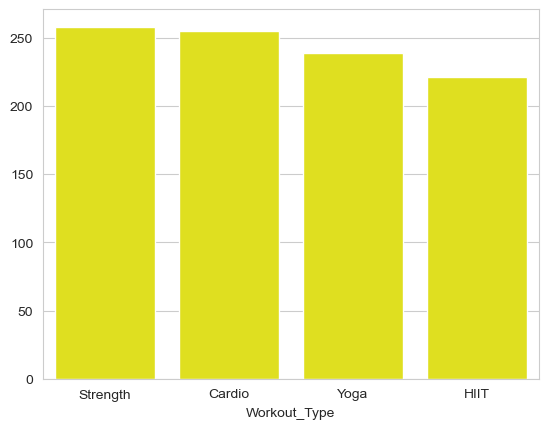

In [323]:
sns.barplot(x=data["Workout_Type"].value_counts().index, 
            y=data["Workout_Type"].value_counts().values, 
            color="yellow")
plt.show()

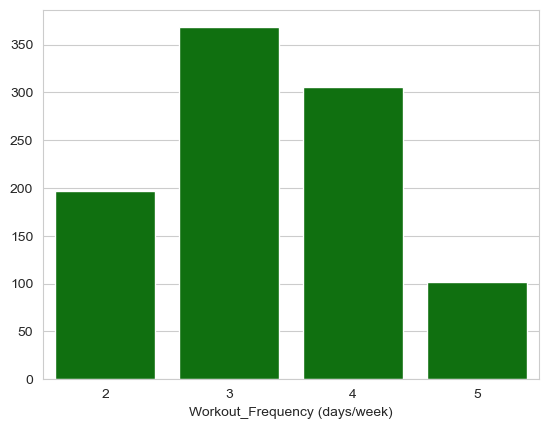

In [324]:
sns.barplot(x=data["Workout_Frequency (days/week)"].value_counts().index, 
            y=data["Workout_Frequency (days/week)"].value_counts().values, 
            color="green")
plt.show()

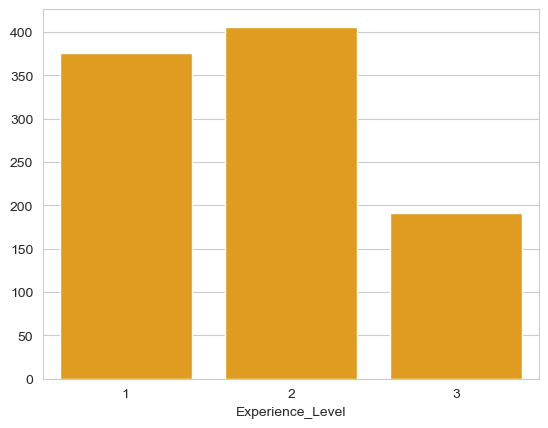

In [325]:
sns.barplot(x=data["Experience_Level"].value_counts().index, 
            y=data["Experience_Level"].value_counts().values, 
            color="orange")
plt.show()

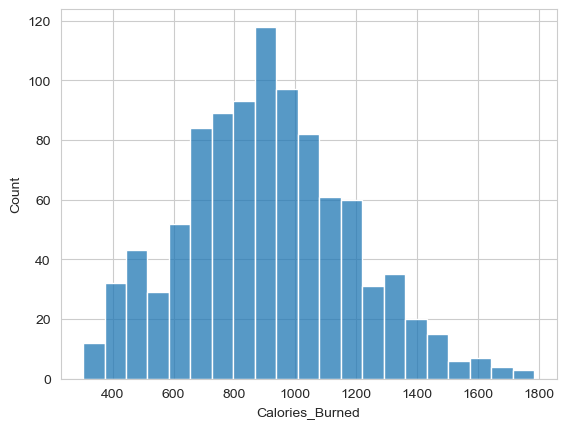

In [326]:
sns.histplot(data, x = "Calories_Burned")
plt.show()

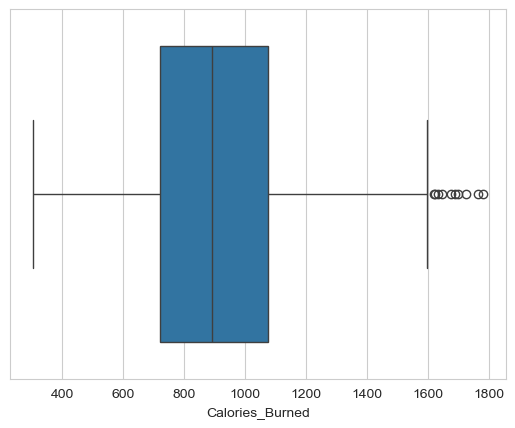

In [327]:
sns.boxplot(data, x = "Calories_Burned")
plt.show()

In [328]:
data[data["Calories_Burned"] > 1600] 

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
90    25    Male         81.5        1.61      170      159           63   
99    24  Female         60.1        1.79      170      165           63   
124   26    Male         86.2        1.68      189      157           72   
475   27    Male         89.3        1.64      192      162           64   
511   39    Male         86.2        1.82      191      160           72   
572   36    Male         88.0        1.71      185      160           73   
646   22    Male         88.5        1.62      174      162           69   
712   19    Male         82.4        1.96      174      169           62   
728   47    Male         87.2        1.64      177      165           50   
910   32    Male         89.8        1.92      199      168           67   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
90                       1.93           1688.0         HIIT            10.9   
99                       1.97           1625.0       Cardio            15.9   
124                      1.97           1701.0     Strength            13.3   
475                      1.82           1622.0         HIIT            12.1   
511                      1.96           1725.0     Strength            10.2   
572                      1.87           1646.0         HIIT            12.0   
646                      1.88           1675.0     Strength            10.7   
712                      1.90           1766.0         HIIT            10.1   
728                      2.00           1634.0     Strength            15.0   
910                      1.93           1783.0     Strength            10.6   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
90                     3.5                              4                 3   
99                     2.7                              4                 3   
124                    3.5                              5                 3   
475                    3.5                              4                 3   
511                    3.5                              5                 3   
572                    3.5                              5                 3   
646                    3.5                              5                 3   
712                    3.5                              5                 3   
728                    3.5                              4                 3   
910                    3.5                              4                 3   

       BMI  
90   31.44  
99   18.76  
124  30.54  
475  33.20  
511  26.02  
572  30.09  
646  33.72  
712  21.45  
728  32.42  
910  24.36

In [329]:
data = data.rename(columns={
    "Weight (kg)": "Weight",
    "Height (m)": "Height",
    "Session_Duration (hours)": "Session_Duration",
    "Water_Intake (liters)": "Water_Intake",
    "Workout_Frequency (days/week)": "Workout_Frequency"
})
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male    88.3    1.71      180      157           60   
1     46  Female    74.9    1.53      179      151           66   
2     32  Female    68.1    1.66      167      122           54   
3     25    Male    53.2    1.70      190      164           56   
4     38    Male    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24    Male    87.1    1.74      187      158           67   
969   25    Male    66.6    1.61      184      166           56   
970   59  Female    60.4    1.76      194      120           53   
971   32    Male   126.4    1.83      198      146           62   
972   46    Male    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned Workout_Type  Fat_Percentage  \
0                1.69           1313.0         Yoga            12.6   
1                1.30            883.0         HIIT            33.9   
2                1.11            677.0       Cardio            33.4   
3                0.59            532.0     Strength            28.8   
4                0.64            556.0     Strength            29.2   
..                ...              ...          ...             ...   
968              1.57           1364.0     Strength            10.0   
969              1.38           1260.0     Strength            25.0   
970              1.72            929.0       Cardio            18.8   
971              1.10            883.0         HIIT            28.2   
972              0.75            542.0     Strength            28.8   

     Water_Intake  Workout_Frequency  Experience_Level    BMI  
0             3.5                  4                 3  30.20  
1             2.1                  4                 2  32.00  
2             2.3                  4                 2  24.71  
3             2.1                  3                 1  18.41  
4             2.8                  3                 1  14.39  
..            ...                ...               ...    ...  
968           3.5                  4                 3  28.77  
969           3.0                  2                 1  25.69  
970           2.7                  5                 3  19.50  
971           2.1                  3                 2  37.74  
972           3.5                  2                 1  33.38  

[973 rows x 15 columns]

In [330]:
data["Ex_Level_Workout_Freq"] = data["Experience_Level"] * data["Workout_Frequency"]
data["VO2_Max"] = 15.3 * (data["Max_BPM"] / data["Resting_BPM"])
data["HRR"] = data["Max_BPM"] - data["Resting_BPM"]
data["Water_Intake_Session_Duration"] = data["Water_Intake"] / data["Session_Duration"]
data["Fat_In_Kg"] = data["Weight"] * data["Fat_Percentage"] / 100
data["BMI_Label"] = ["Underweight" if bmi < 18.5 else 
                     "Normal weight" if 18.5 <= bmi < 25 else 
                     "Overweight" if 25 <= bmi < 30 else 
                     "Obese" for bmi in data["BMI"]]
data["Session_Duration_Workout_Frequency"] = data["Session_Duration"] * data["Workout_Frequency"]

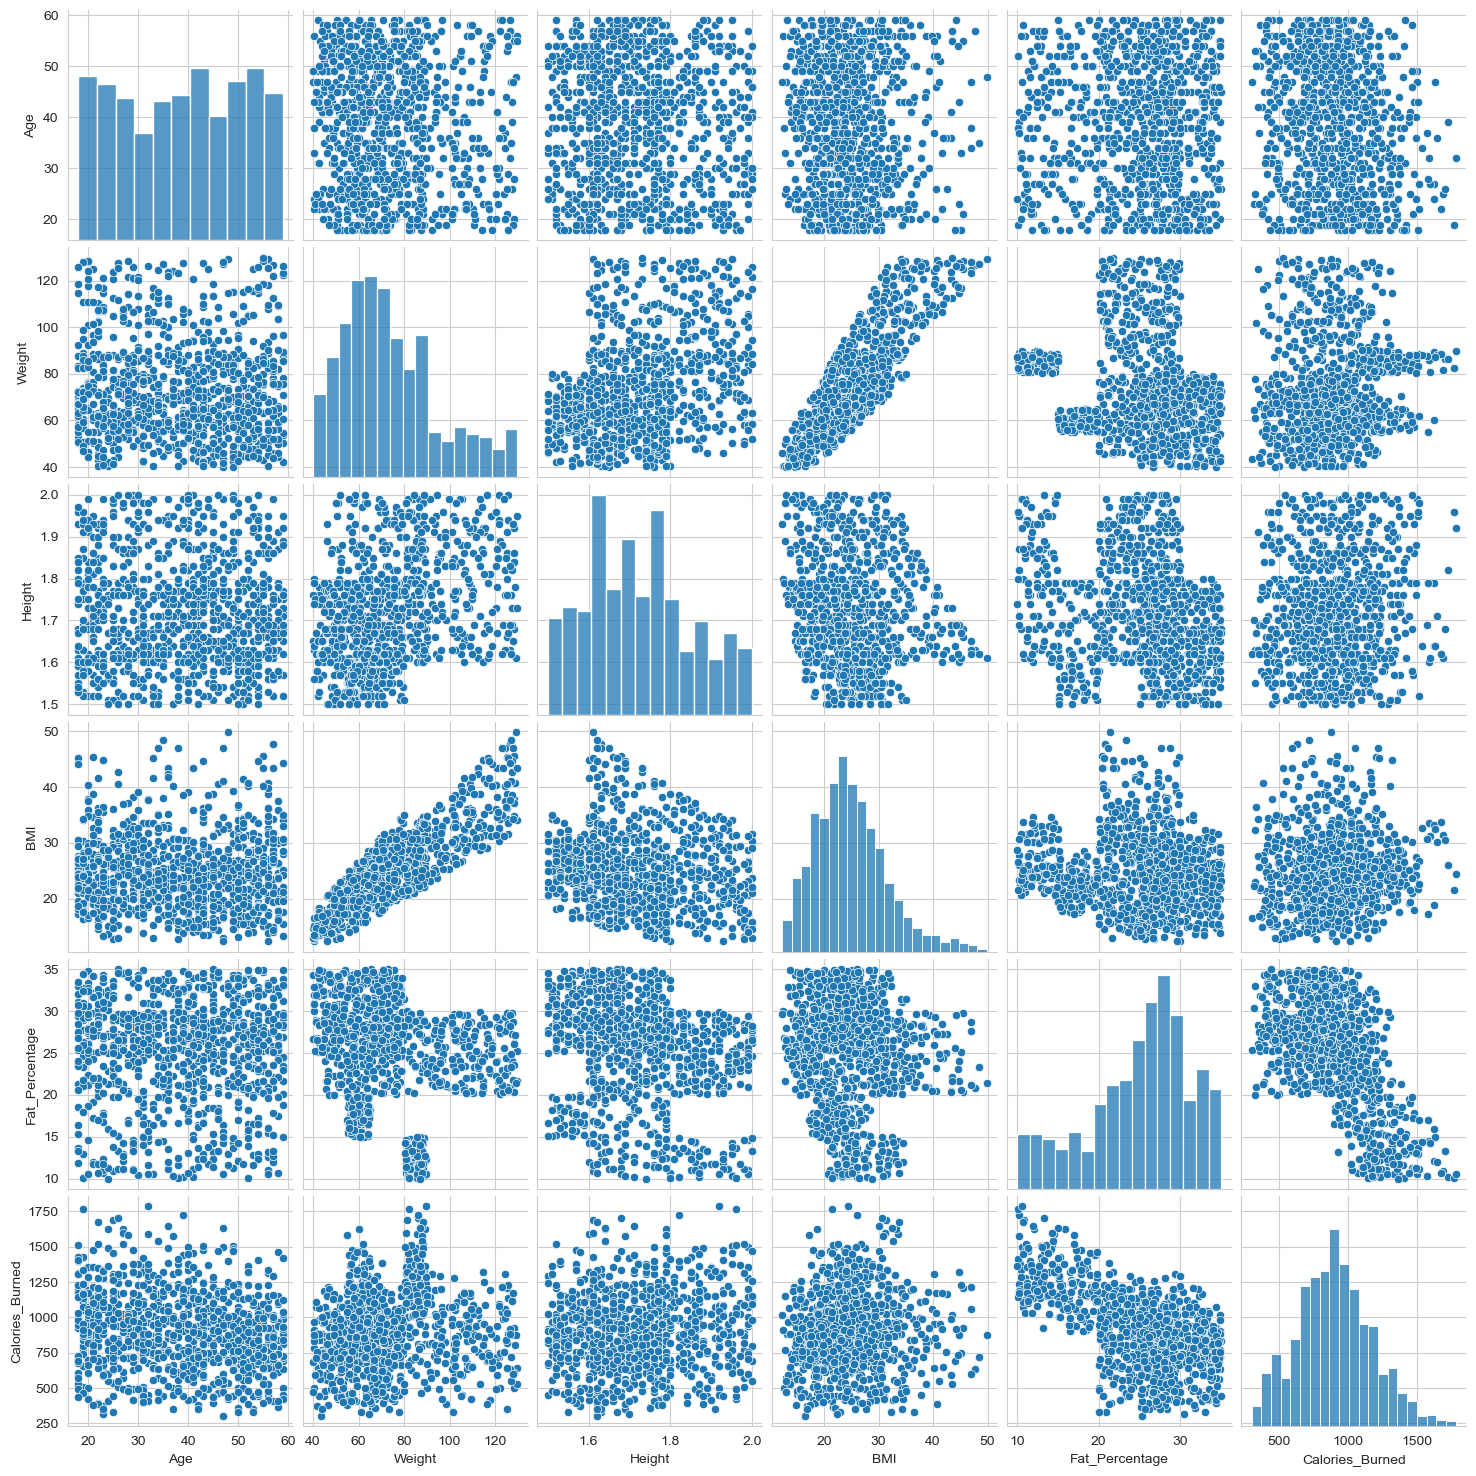

In [331]:
data1 = data[["Age", "Weight", "Height", "BMI", "Fat_Percentage","Calories_Burned"]]
sns.set_style("whitegrid")
sns.pairplot(data1)
plt.show()

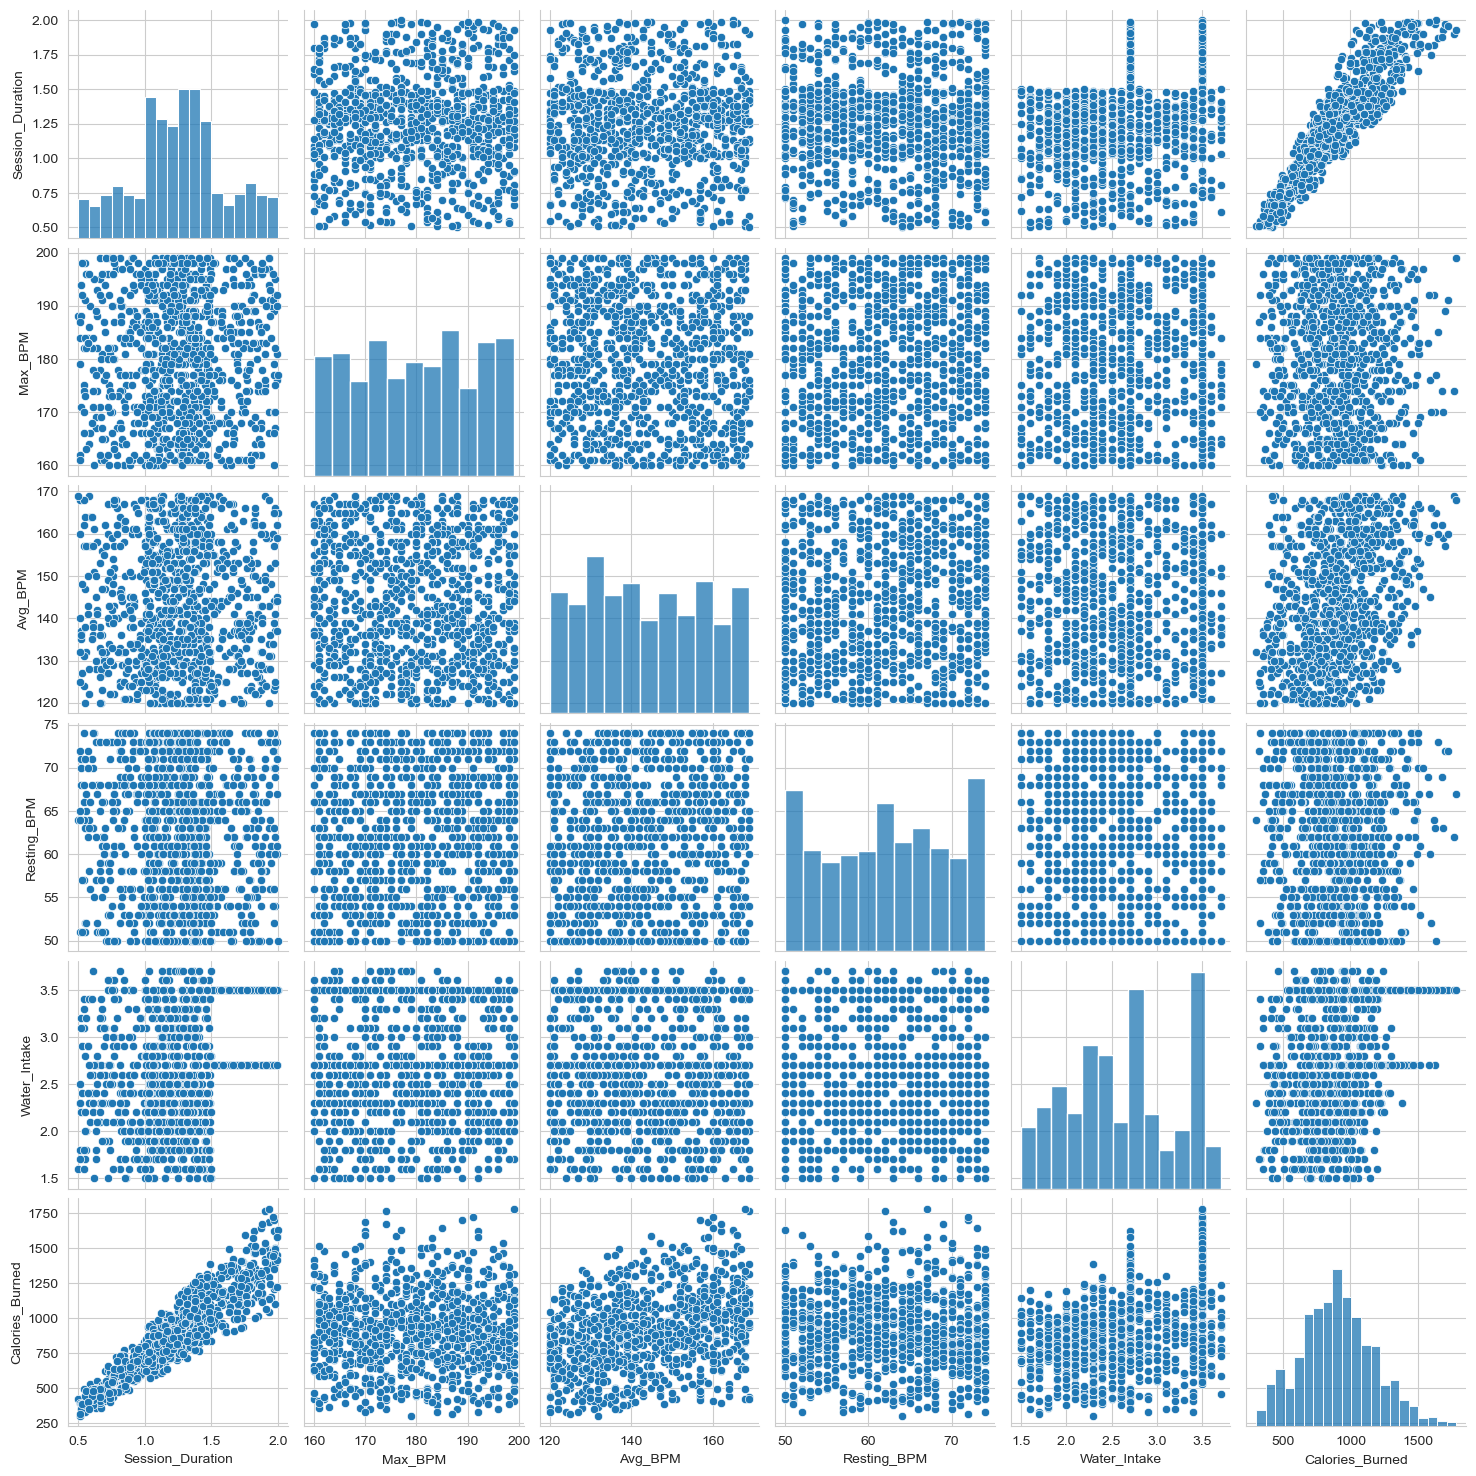

In [332]:
data2 = data[["Session_Duration", "Max_BPM", "Avg_BPM", "Resting_BPM", "Water_Intake",
              "Calories_Burned"]]
sns.set_style("whitegrid")
sns.pairplot(data2)
plt.show()

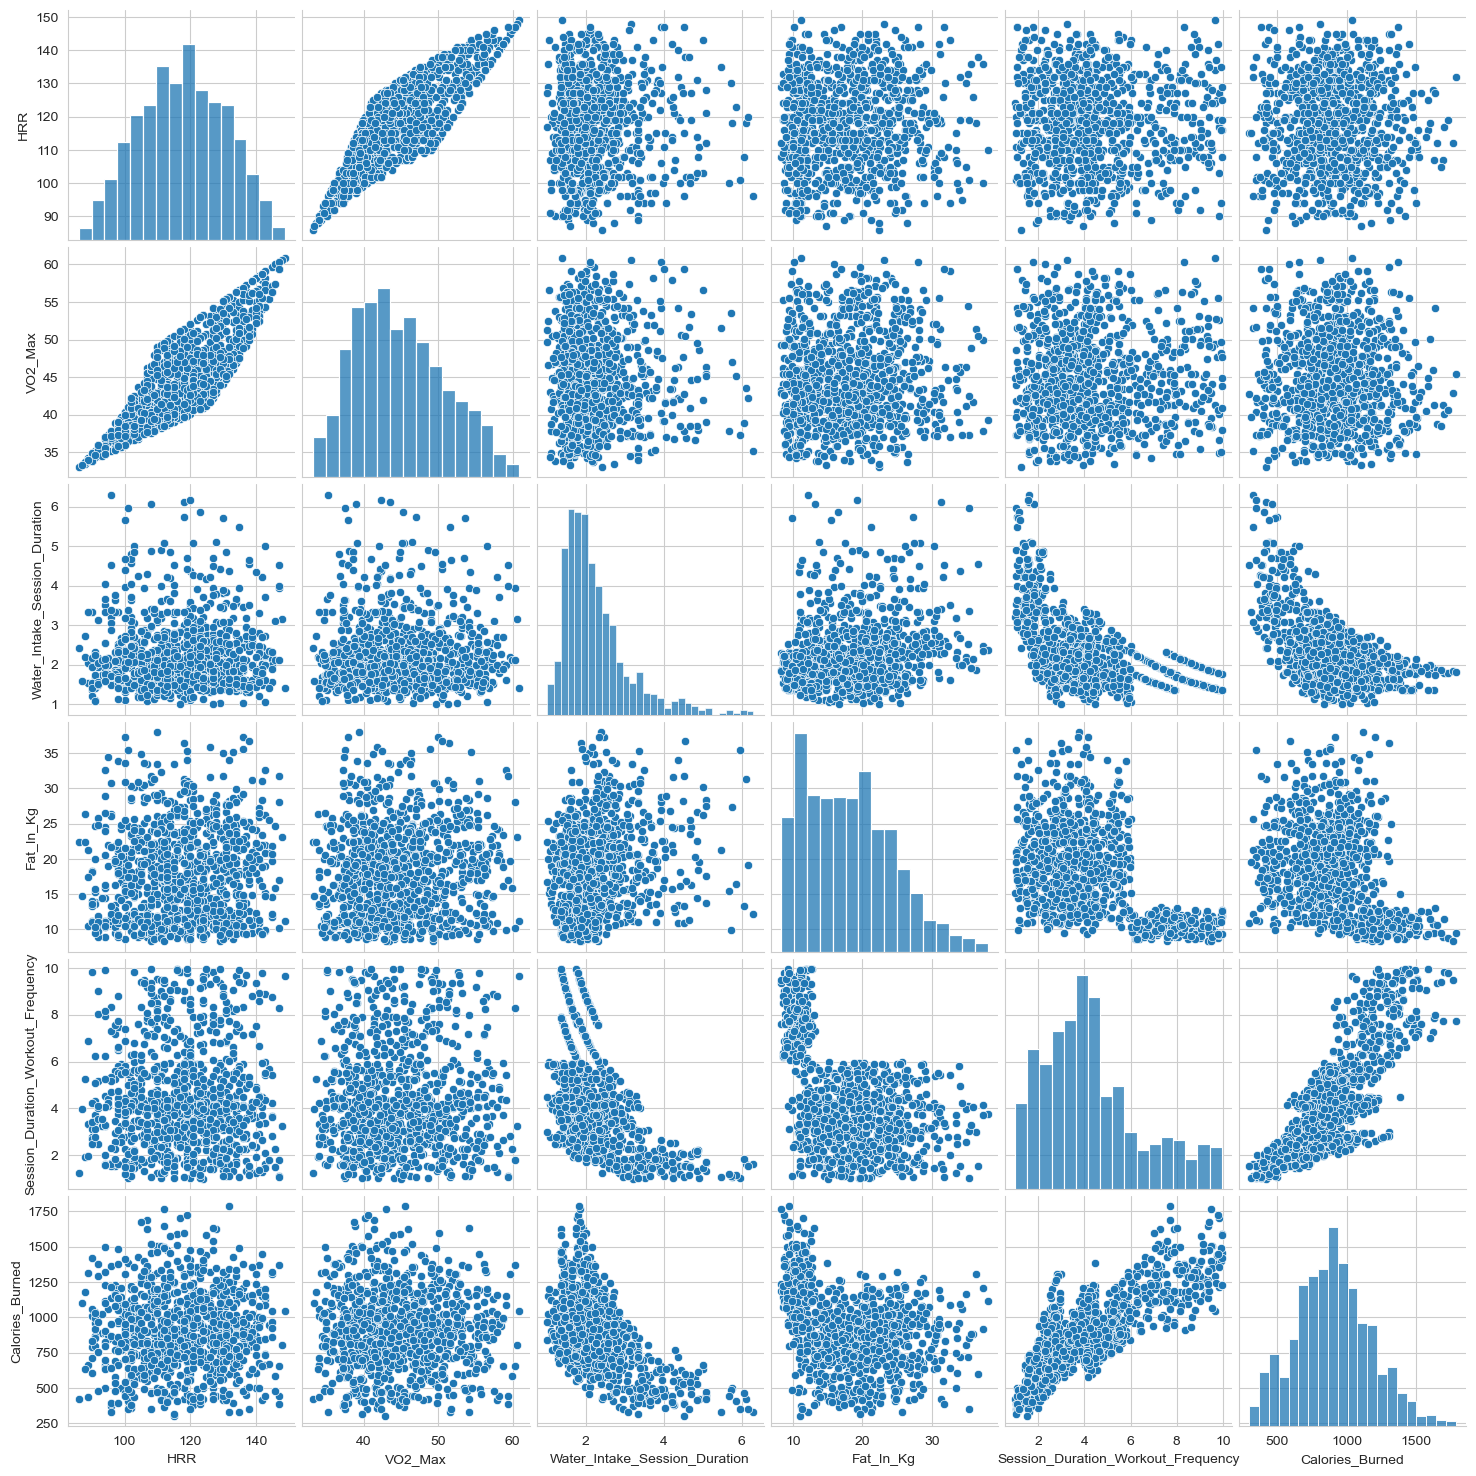

In [333]:
data3 = data[["HRR", "VO2_Max", "Water_Intake_Session_Duration", "Fat_In_Kg", "Session_Duration_Workout_Frequency", "Calories_Burned"]]
sns.set_style("whitegrid")
sns.pairplot(data3)
plt.show()

In [334]:
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns.drop(['Calories_Burned', 'Experience_Level' ,
                                                                                  'Workout_Frequency', "Ex_Level_Workout_Freq"])
categorical_features = data.select_dtypes(include=['object']).columns.tolist() + ["Experience_Level"] + ["Workout_Frequency"] + ["Ex_Level_Workout_Freq"]

def plot_relationships(data, target, numeric_features, categorical_features):

    for feature in numeric_features:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=data[feature], y=data[target], alpha=0.7, edgecolor='k', color = "lightblue")
        plt.title(f"{target} vs {feature}")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.grid(True)
        plt.show()

    for feature in categorical_features:
        fig, axes = plt.subplots(1, 2, figsize=(16, 5), gridspec_kw={'width_ratios': [1, 1]})

        sns.boxplot(x=data[feature], y=data[target], ax=axes[0], color="green")
        axes[0].set_title(f"{target} by {feature} - Boxplot")
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel(target)
        axes[0].grid(True)

        for category in data[feature].unique():
            sns.histplot(data=data[data[feature] == category], x=target, label=str(category), ax=axes[1], kde=True, alpha=0.5)
        axes[1].set_title(f"{target} Distribution by {feature} - Histogram")
        axes[1].set_xlabel(target)
        axes[1].set_ylabel("Frequency")
        axes[1].legend(title=feature)
        axes[1].grid(True)

        plt.tight_layout()
        plt.show()

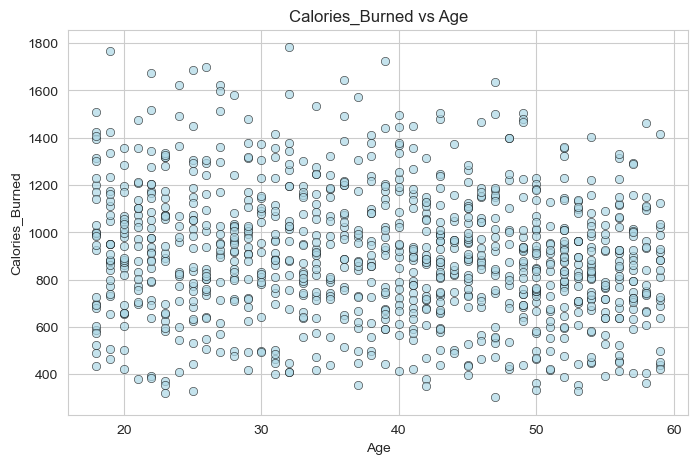

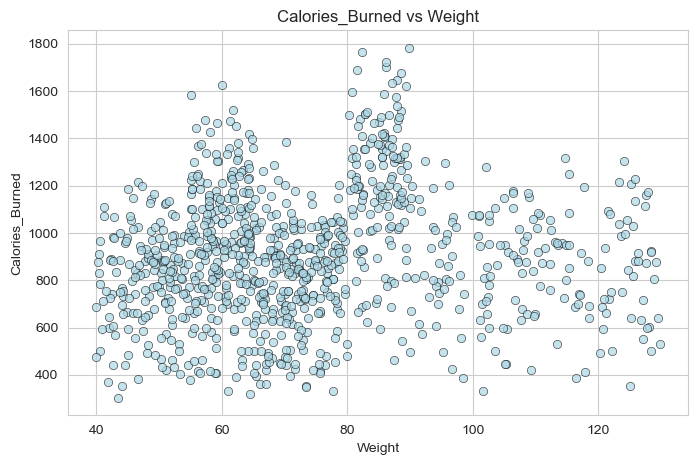

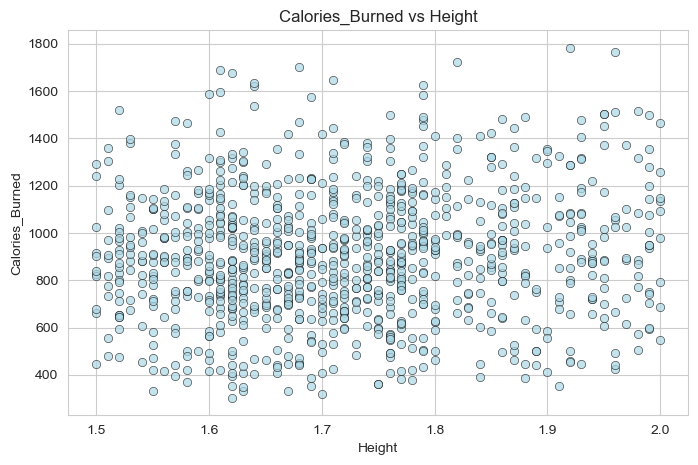

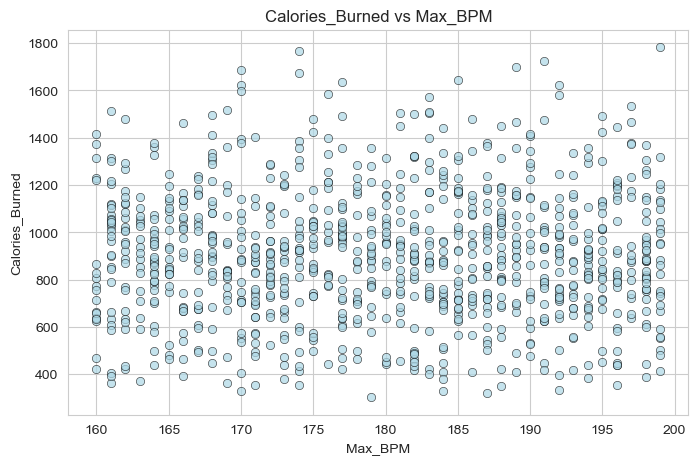

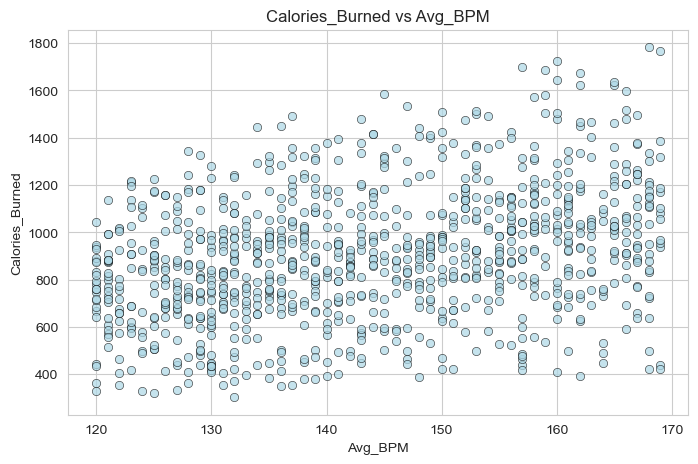

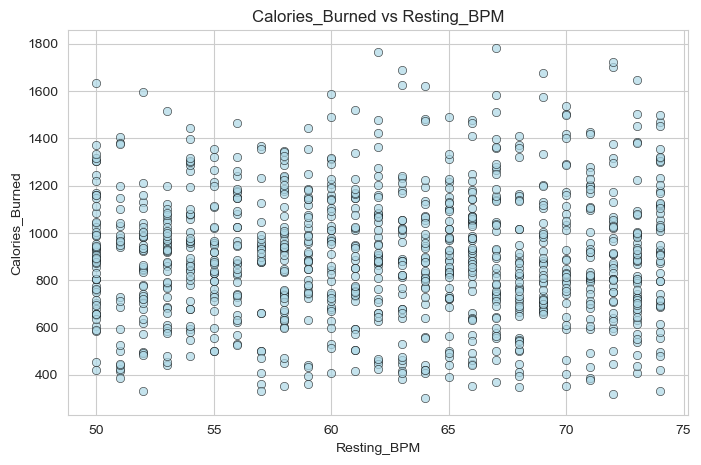

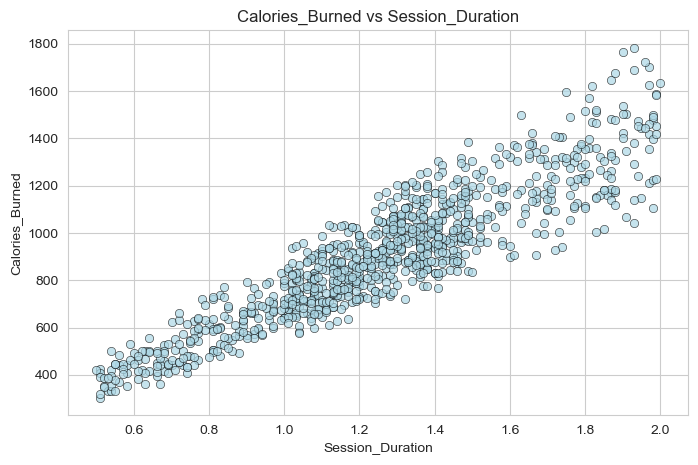

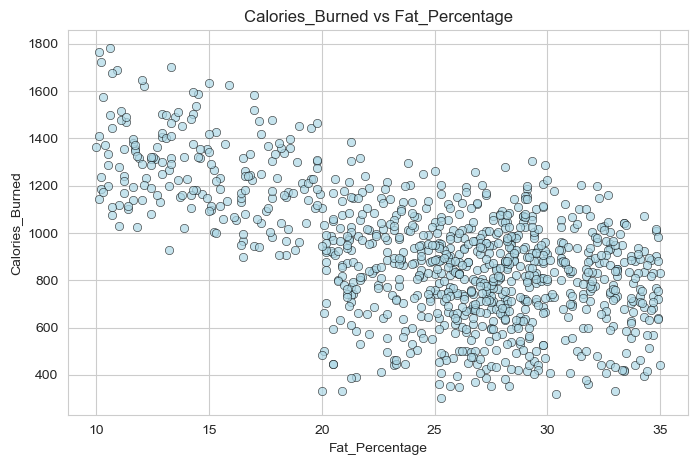

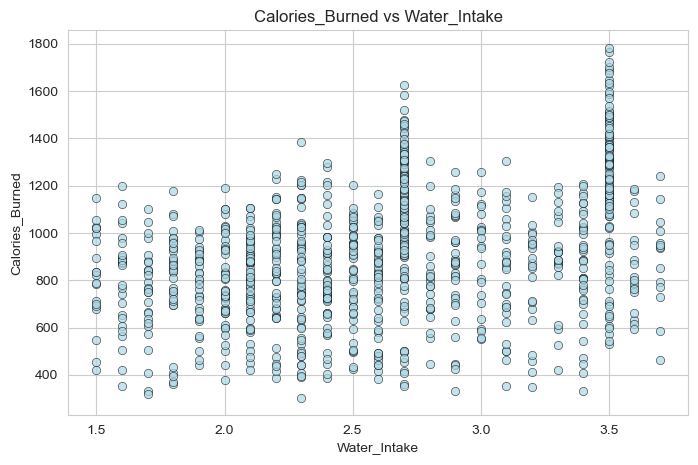

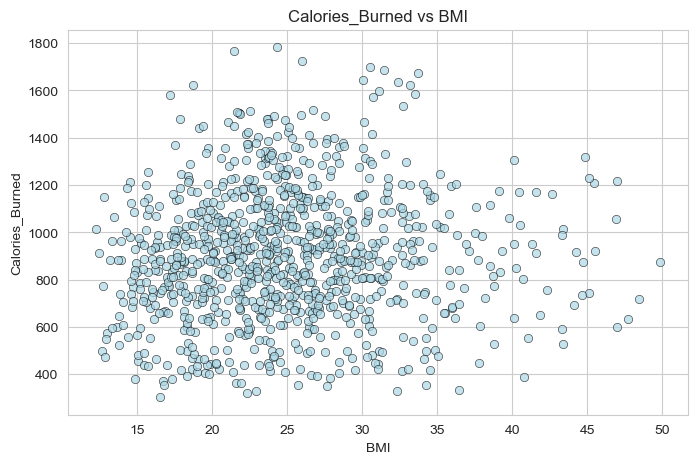

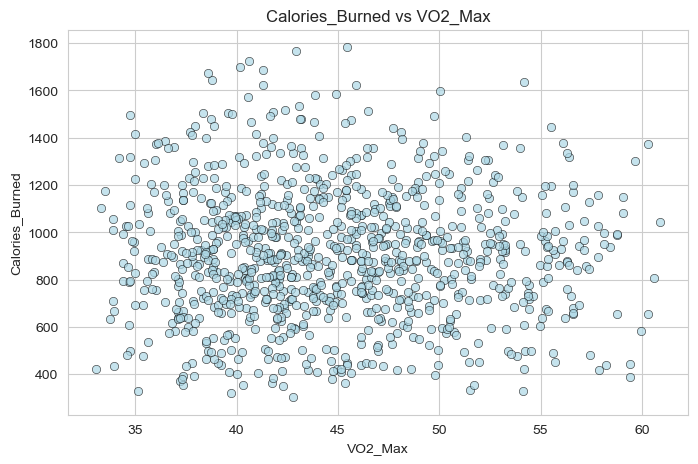

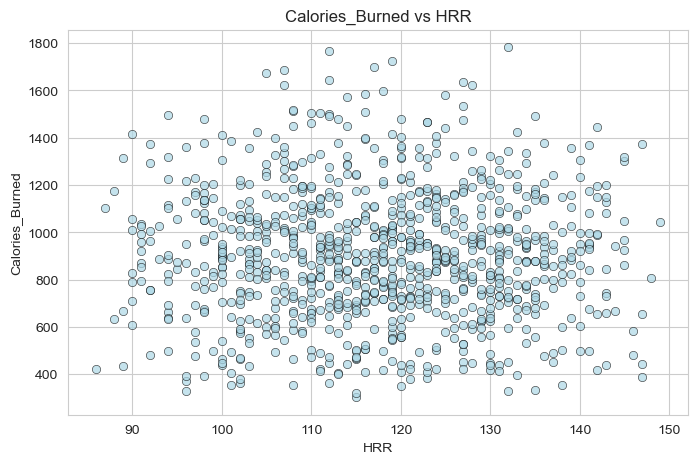

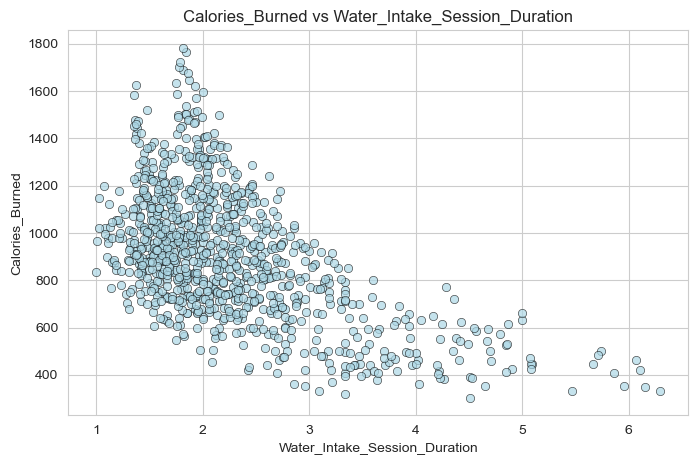

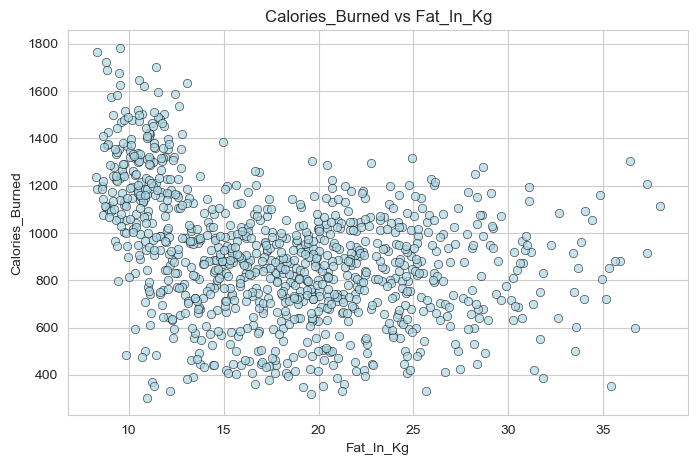

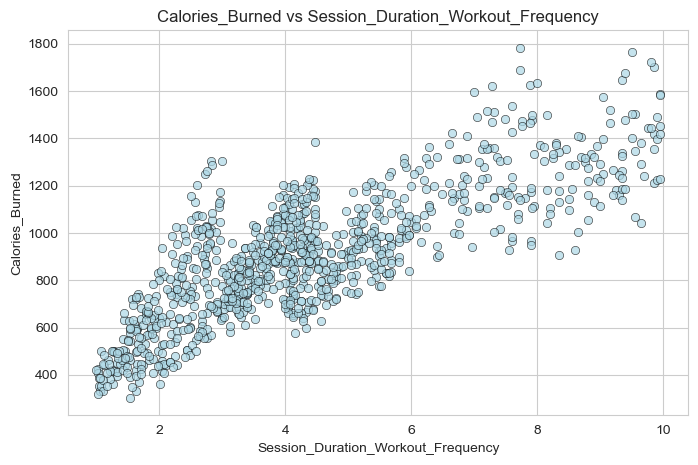

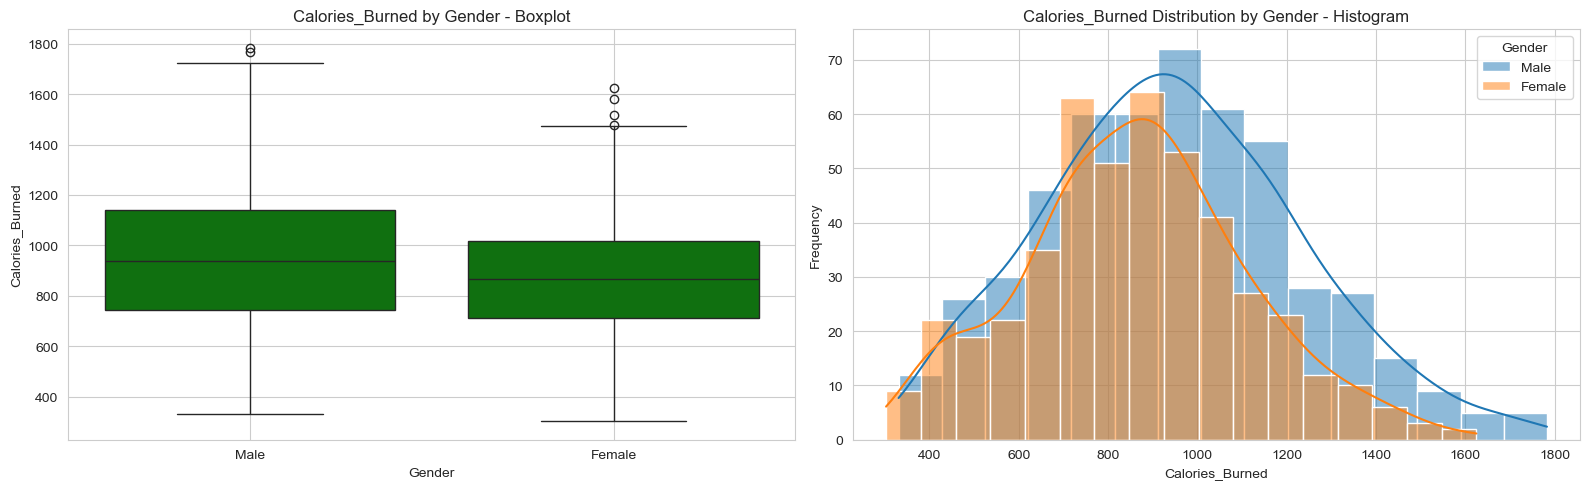

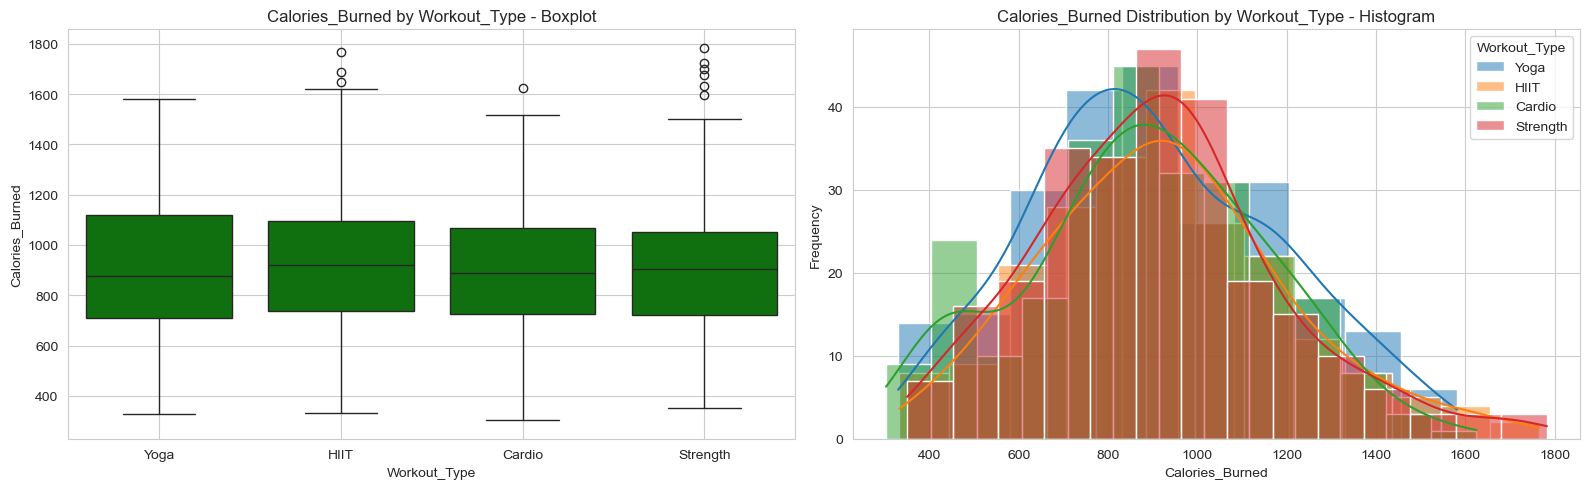

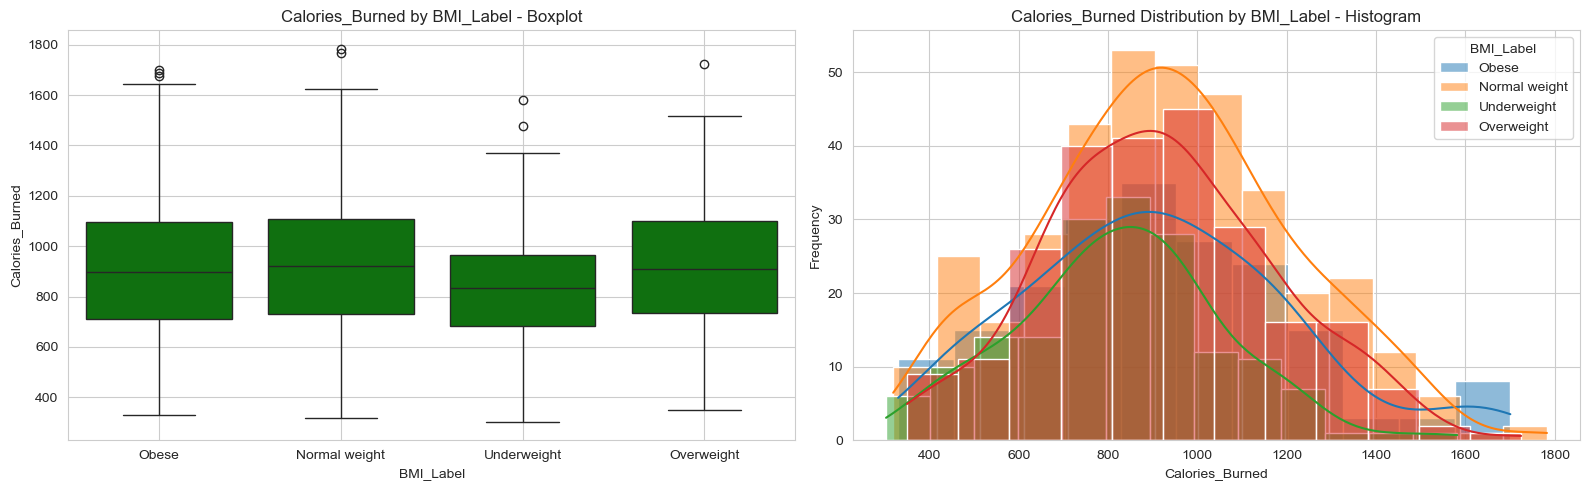

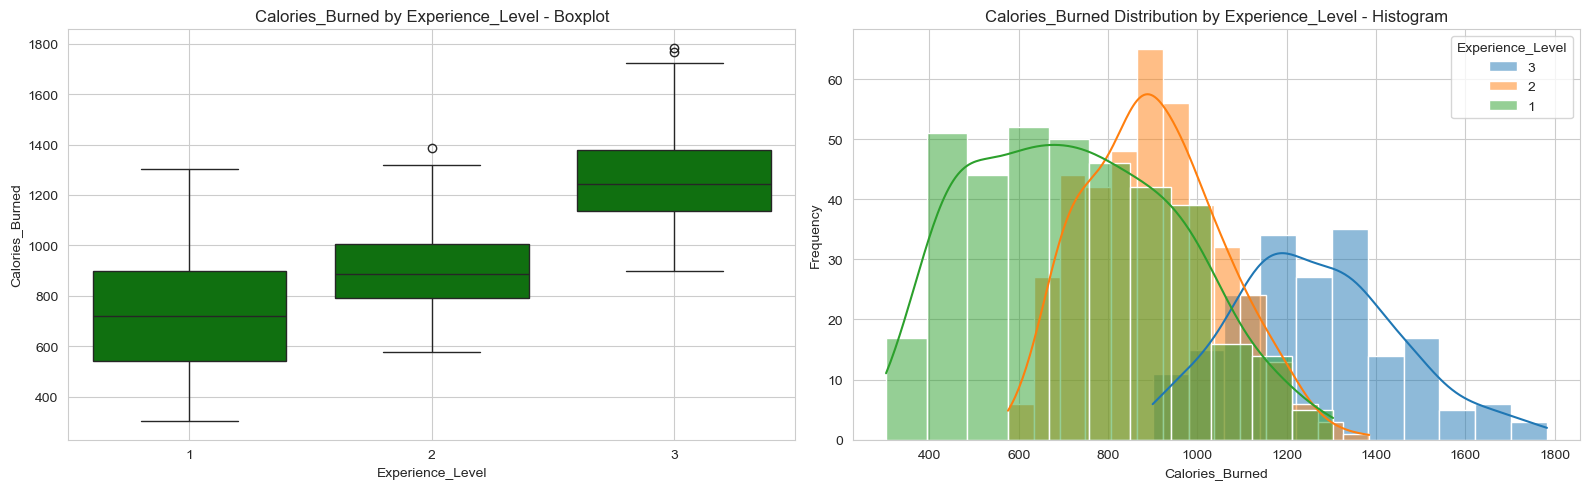

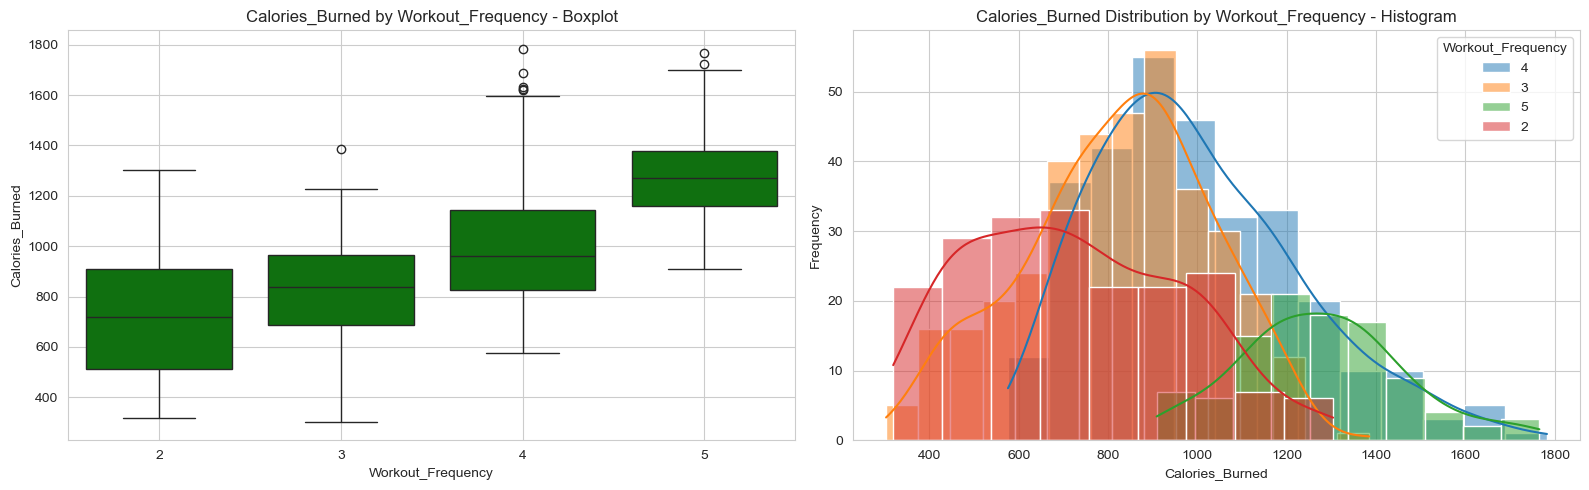

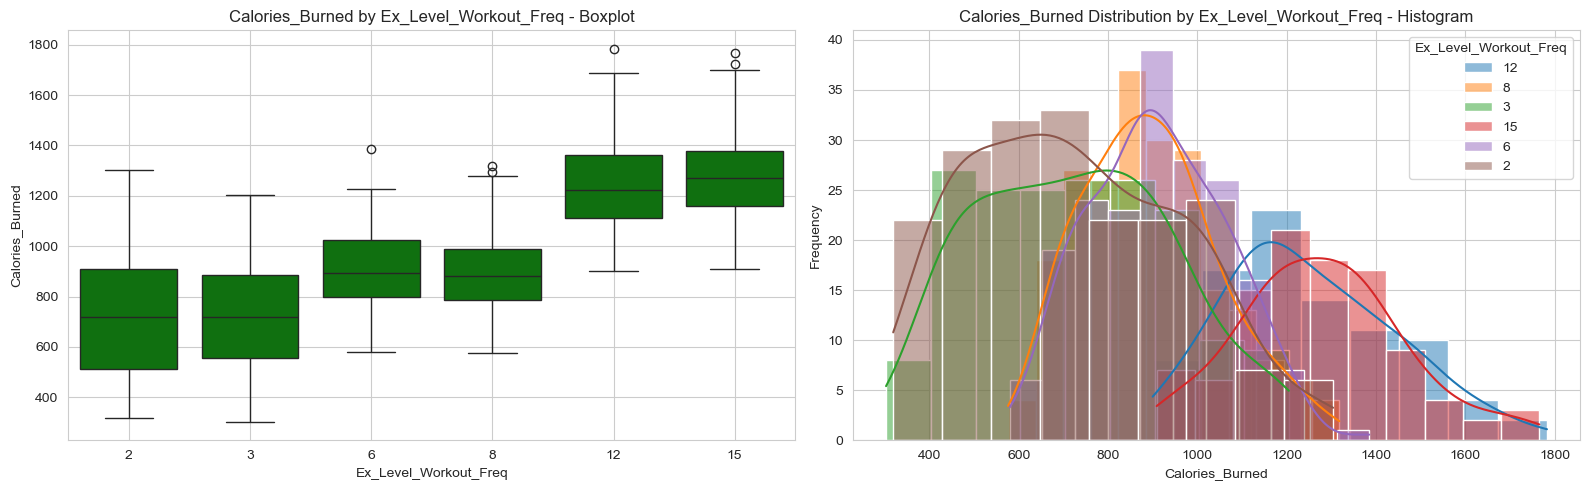

In [335]:
plot_relationships(data, target='Calories_Burned', numeric_features=numeric_features, categorical_features=categorical_features)

In [336]:
raw_data = data.copy(deep=True)
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
data['Gender'] = encoder1.fit_transform(data["Gender"])
data["Workout_Type"] = encoder2.fit_transform(data["Workout_Type"])
data["BMI_Label"] = encoder2.fit_transform(data["BMI_Label"])
data_copy = data.copy(deep=True)
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Workout_Frequency  \
0                1.69           1313.0             3  ...                  4   
1                1.30            883.0             1  ...                  4   
2                1.11            677.0             0  ...                  4   
3                0.59            532.0             2  ...                  3   
4                0.64            556.0             2  ...                  3   
..                ...              ...           ...  ...                ...   
968              1.57           1364.0             2  ...                  4   
969              1.38           1260.0             2  ...                  2   
970              1.72            929.0             0  ...                  5   
971              1.10            883.0             1  ...                  3   
972              0.75            542.0             2  ...                  2   

     Experience_Level    BMI  Ex_Level_Workout_Freq    VO2_Max  HRR  \
0                   3  30.20                     12  45.900000  120   
1                   2  32.00                      8  41.495455  113   
2                   2  24.71                      8  47.316667  113   
3                   1  18.41                      3  51.910714  134   
4                   1  14.39                      3  42.300000  120   
..                ...    ...                    ...        ...  ...   
968                 3  28.77                     12  42.702985  120   
969                 1  25.69                      2  50.271429  128   
970                 3  19.50                     15  56.003774  141   
971                 2  37.74                      6  48.861290  136   
972                 1  33.38                      2  38.481818  100   

     Water_Intake_Session_Duration  Fat_In_Kg  BMI_Label  \
0                         2.071006    11.1258          1   
1                         1.615385    25.3911          1   
2                         2.072072    22.7454          0   
3                         3.559322    15.3216          3   
4                         4.375000    13.4612          3   
..                             ...        ...        ...   
968                       2.229299     8.7100          2   
969                       2.173913    16.6500          2   
970                       1.569767    11.3552          0   
971                       1.909091    35.6448          1   
972                       4.666667    25.5456          1   

     Session_Duration_Workout_Frequency  
0                                  6.76  
1                                  5.20  
2                                  4.44  
3                                  1.77  
4                                  1.92  
..                                  ...  
968                                6.28  
969                                2.76  
970                                8.60  
971                                3.30  
972                                1.50  

[973 rows x 22 columns]

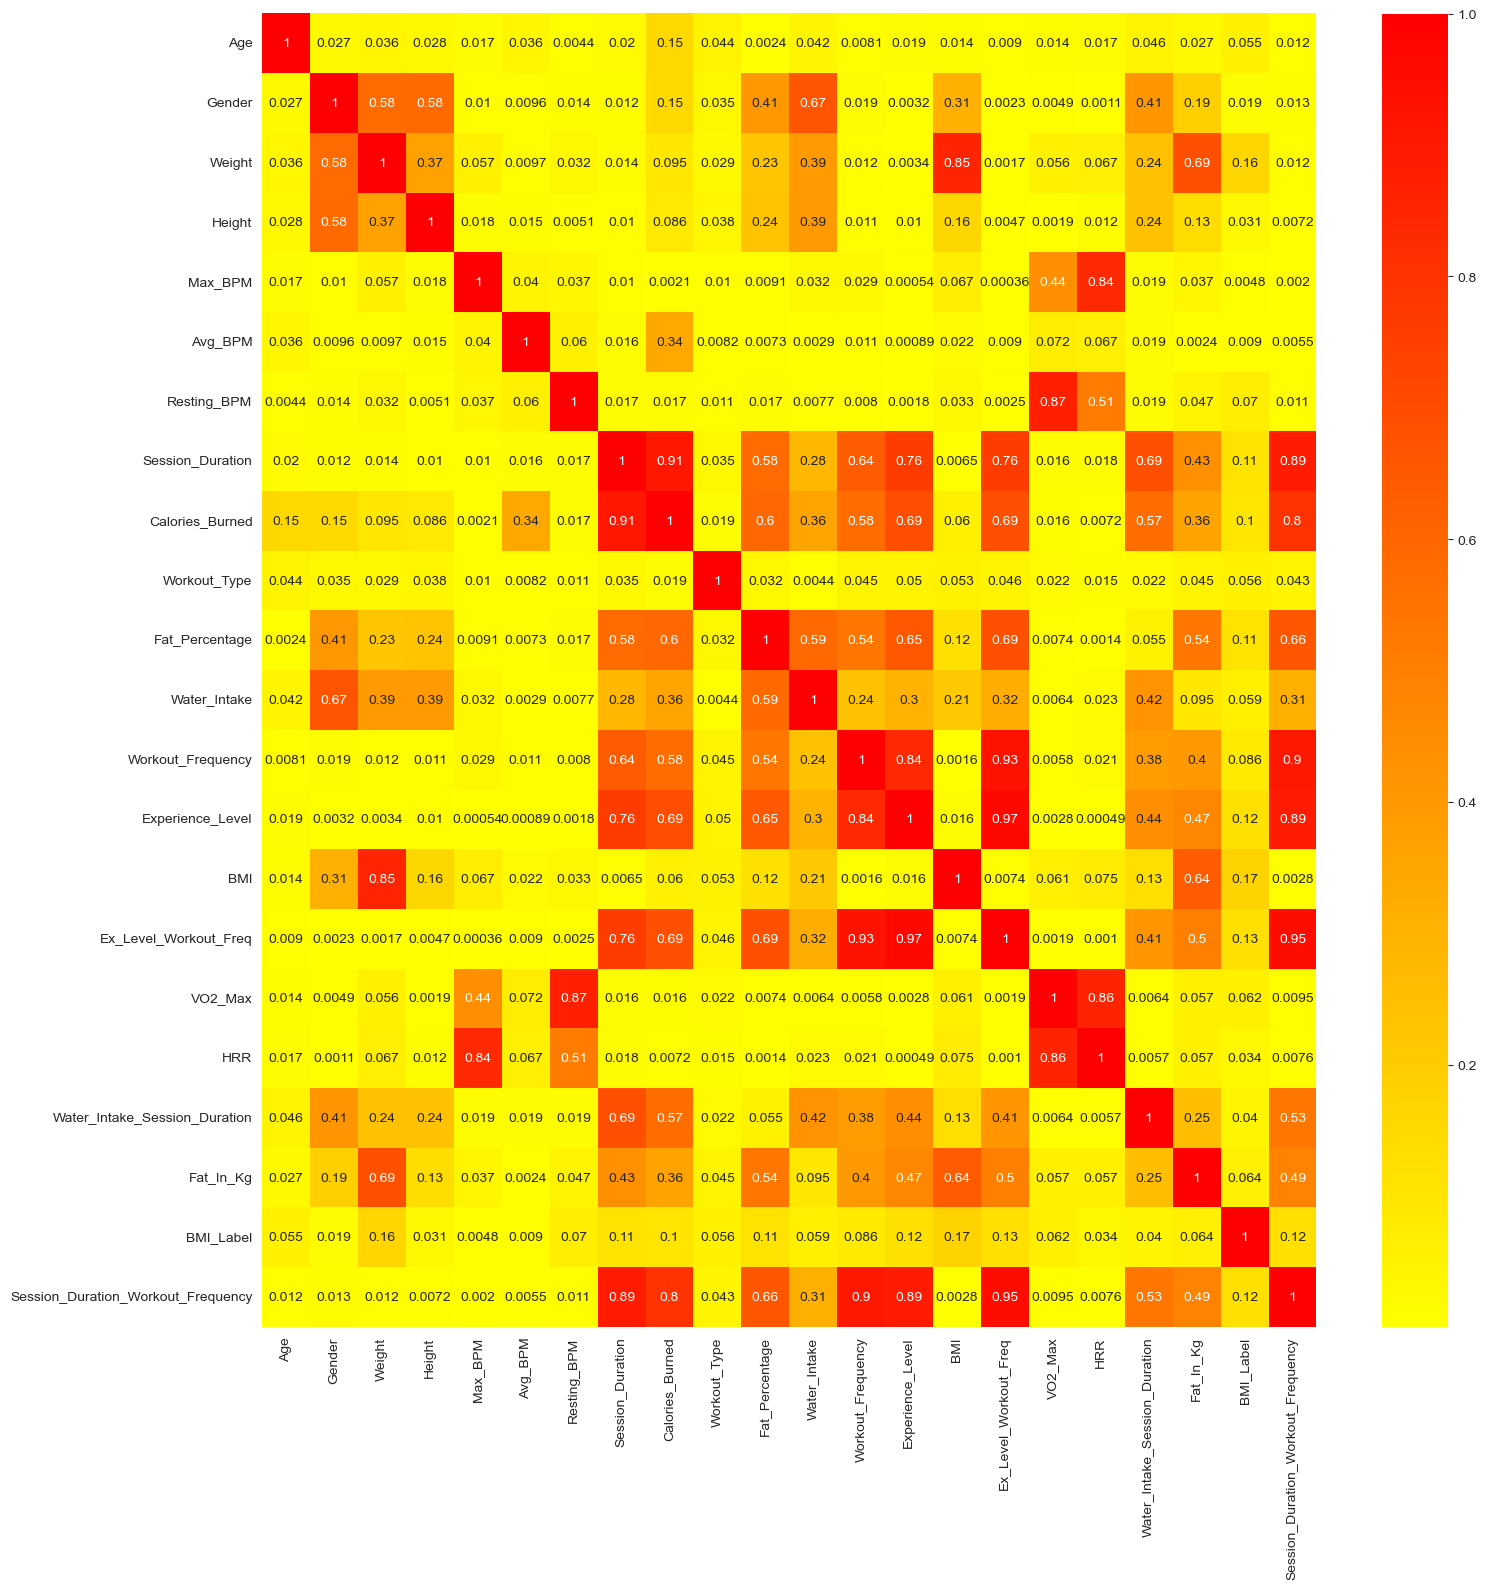

In [337]:
corr_matrix = data_copy.corr()
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(abs(corr_matrix), annot=True, cmap=plt.cm.autumn_r)
fig.tight_layout()
plt.show()

In [338]:
def cross_validate_model_with_train_test(data, formula, string, n_splits=5):
    train_mse_scores, test_mse_scores = [], []
    train_rmse_scores, test_rmse_scores = [], []
    train_mae_scores, test_mae_scores = [], []
    train_r2_scores, test_r2_scores = [], []
    train_rse_scores, test_rse_scores = [], []

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        model = smf.ols(formula=formula, data=train_data).fit()

        train_predictions = model.predict(train_data)
        test_predictions = model.predict(test_data)

        if string == "Calories_Burned_SQRT":
            train_residuals = train_data[string]**2 - train_predictions**2
            test_residuals = test_data[string]**2 - test_predictions**2

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - model.df_model - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - model.df_model - 1))
        
            train_mse = mean_squared_error(train_data[string]**2, train_predictions**2)
            train_rmse = np.sqrt(train_mse)
            train_mae = mean_absolute_error(train_data[string]**2, train_predictions**2)
            train_r2 = r2_score(train_data[string]**2, train_predictions**2)

            test_mse = mean_squared_error(test_data[string]**2, test_predictions**2)
            test_rmse = np.sqrt(test_mse)
            test_mae = mean_absolute_error(test_data[string]**2, test_predictions**2)
            test_r2 = r2_score(test_data[string]**2, test_predictions**2)
        else:
            train_residuals = train_data[string] - train_predictions
            test_residuals = test_data[string] - test_predictions

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - model.df_model - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - model.df_model - 1))

            train_mse = mean_squared_error(train_data[string], train_predictions)
            train_rmse = np.sqrt(train_mse)
            train_mae = mean_absolute_error(train_data[string], train_predictions)
            train_r2 = r2_score(train_data[string], train_predictions)

            test_mse = mean_squared_error(test_data[string], test_predictions)
            test_rmse = np.sqrt(test_mse)
            test_mae = mean_absolute_error(test_data[string], test_predictions)
            test_r2 = r2_score(test_data[string], test_predictions)

        train_mse_scores.append(train_mse)
        test_mse_scores.append(test_mse)

        train_rmse_scores.append(train_rmse)
        test_rmse_scores.append(test_rmse)

        train_mae_scores.append(train_mae)
        test_mae_scores.append(test_mae)

        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)

        train_rse_scores.append(train_rse)
        test_rse_scores.append(test_rse)

    return {
        "Train_MSE": (np.mean(train_mse_scores), np.std(train_mse_scores)),
        "Test_MSE": (np.mean(test_mse_scores), np.std(test_mse_scores)),
        "Train_RMSE": (np.mean(train_rmse_scores), np.std(train_rmse_scores)),
        "Test_RMSE": (np.mean(test_rmse_scores), np.std(test_rmse_scores)),
        "Train_MAE": (np.mean(train_mae_scores), np.std(train_mae_scores)),
        "Test_MAE": (np.mean(test_mae_scores), np.std(test_mae_scores)),
        "Train_R2": (np.mean(train_r2_scores), np.std(train_r2_scores)),
        "Test_R2": (np.mean(test_r2_scores), np.std(test_r2_scores)),
        "Train_RSE": (np.mean(train_rse_scores), np.std(train_rse_scores)),
        "Test_RSE": (np.mean(test_rse_scores), np.std(test_rse_scores)),
    }


In [339]:
def cross_validate_model_with_train_test_regularization(data, model, target_column, n_splits=5):
    train_mse_scores, test_mse_scores = [], []
    train_rmse_scores, test_rmse_scores = [], []
    train_mae_scores, test_mae_scores = [], []
    train_r2_scores, test_r2_scores = [], []
    train_rse_scores, test_rse_scores = [], []

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        train_target = target_column.iloc[train_index]
        test_target = target_column.iloc[test_index]

        model.fit(train_data, train_target)

        train_predictions = model.predict(train_data)
        test_predictions = model.predict(test_data)

        if target_column.name == "Calories_Burned_SQRT":
            train_residuals = train_target**2 - train_predictions**2
            test_residuals = test_target**2 - test_predictions**2

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - len(train_data.columns) - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - len(test_data.columns) - 1))

            train_mse = mean_squared_error(train_target**2, train_predictions**2)
            test_mse = mean_squared_error(test_target**2, test_predictions**2)

            train_rmse = np.sqrt(train_mse)
            test_rmse = np.sqrt(test_mse)

            train_mae = mean_absolute_error(train_target**2, train_predictions**2)
            test_mae = mean_absolute_error(test_target**2, test_predictions**2)

            train_r2 = r2_score(train_target**2, train_predictions**2)
            test_r2 = r2_score(test_target**2, test_predictions**2)
        else:
            train_residuals = train_target - train_predictions
            test_residuals = test_target - test_predictions

            train_rss = np.sum(train_residuals ** 2)
            test_rss = np.sum(test_residuals ** 2)

            train_rse = np.sqrt(train_rss / (len(train_data) - len(train_data.columns) - 1))
            test_rse = np.sqrt(test_rss / (len(test_data) - len(test_data.columns) - 1))

            train_mse = mean_squared_error(train_target, train_predictions)
            test_mse = mean_squared_error(test_target, test_predictions)

            train_rmse = np.sqrt(train_mse)
            test_rmse = np.sqrt(test_mse)

            train_mae = mean_absolute_error(train_target, train_predictions)
            test_mae = mean_absolute_error(test_target, test_predictions)

            train_r2 = r2_score(train_target, train_predictions)
            test_r2 = r2_score(test_target, test_predictions)

        train_mse_scores.append(train_mse)
        test_mse_scores.append(test_mse)

        train_rmse_scores.append(train_rmse)
        test_rmse_scores.append(test_rmse)

        train_mae_scores.append(train_mae)
        test_mae_scores.append(test_mae)

        train_r2_scores.append(train_r2)
        test_r2_scores.append(test_r2)

        train_rse_scores.append(train_rse)
        test_rse_scores.append(test_rse)

    return {
        "Train_MSE": (np.mean(train_mse_scores), np.std(train_mse_scores)),
        "Test_MSE": (np.mean(test_mse_scores), np.std(test_mse_scores)),
        "Train_RMSE": (np.mean(train_rmse_scores), np.std(train_rmse_scores)),
        "Test_RMSE": (np.mean(test_rmse_scores), np.std(test_rmse_scores)),
        "Train_MAE": (np.mean(train_mae_scores), np.std(train_mae_scores)),
        "Test_MAE": (np.mean(test_mae_scores), np.std(test_mae_scores)),
        "Train_R2": (np.mean(train_r2_scores), np.std(train_r2_scores)),
        "Test_R2": (np.mean(test_r2_scores), np.std(test_r2_scores)),
        "Train_RSE": (np.mean(train_rse_scores), np.std(train_rse_scores)),
        "Test_RSE": (np.mean(test_rse_scores), np.std(test_rse_scores)),
    }

In [340]:
predictors = ["Session_Duration", "Fat_Percentage", "Experience_Level", "Workout_Frequency"]
X = data[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

             Feature       VIF
1   Session_Duration  2.478123
2     Fat_Percentage  1.800075
3   Experience_Level  5.228264
4  Workout_Frequency  3.344205


In [341]:
predictors = ["Session_Duration", "Fat_Percentage", "Ex_Level_Workout_Freq"]
X = data[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

                 Feature       VIF
1       Session_Duration  2.430726
2         Fat_Percentage  1.914273
3  Ex_Level_Workout_Freq  3.031468


In [342]:
model0 = smf.ols(formula="Calories_Burned ~ Session_Duration + Fat_Percentage +  Ex_Level_Workout_Freq", 
                 data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     1630.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:59:07   Log-Likelihood:                -5961.4
No. Observations:                 973   AIC:                         1.193e+04
Df Residuals:                     969   BIC:                         1.195e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               198.50

In [343]:
data["Residuals"] = data["Calories_Burned"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  \
0                1.69           1313.0             3  ...   
1                1.30            883.0             1  ...   
2                1.11            677.0             0  ...   
3                0.59            532.0             2  ...   
4                0.64            556.0             2  ...   
..                ...              ...           ...  ...   
968              1.57           1364.0             2  ...   
969              1.38           1260.0             2  ...   
970              1.72            929.0             0  ...   
971              1.10            883.0             1  ...   
972              0.75            542.0             2  ...   

     Ex_Level_Workout_Freq    VO2_Max  HRR  Water_Intake_Session_Duration  \
0                       12  45.900000  120                       2.071006   
1                        8  41.495455  113                       1.615385   
2                        8  47.316667  113                       2.072072   
3                        3  51.910714  134                       3.559322   
4                        3  42.300000  120                       4.375000   
..                     ...        ...  ...                            ...   
968                     12  42.702985  120                       2.229299   
969                      2  50.271429  128                       2.173913   
970                     15  56.003774  141                       1.569767   
971                      6  48.861290  136                       1.909091   
972                      2  38.481818  100                       4.666667   

     Fat_In_Kg  BMI_Label  Session_Duration_Workout_Frequency    Predicted  \
0      11.1258          1                                6.76  1256.652125   
1      25.3911          1                                5.20   874.767841   
2      22.7454          0                                4.44   742.465762   
3      15.3216          3                                1.77   428.822084   
4      13.4612          3                                1.92   462.032157   
..         ...        ...                                 ...          ...   
968     8.7100          2                                6.28  1186.761903   
969    16.6500          2                                2.76  1019.922130   
970    11.3552          0                                8.60  1223.447982   
971    35.6448          1                                3.30   778.105661   
972    25.5456          1                                1.50   548.575603   

      Residuals  Std_Residuals  
0     56.347875       0.508204  
1      8.232159       0.074246  
2    -65.465762      -0.590439  
3    103.177916       0.930566  
4     93.967843       0.847500  
..          ...            ...  
968  177.238097       1.598519  
969  240.077870       2.165273  
970 -294.447982      -2.655640  
971  104.894339       0.946047  
972   -6.575603      -0.059306  

[973 rows x 25 columns]

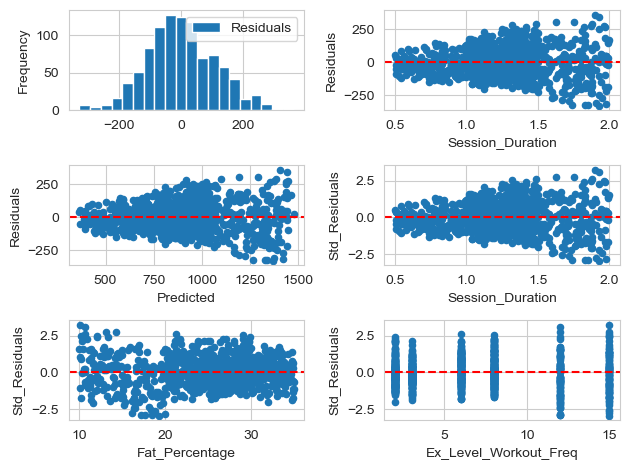

In [344]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Ex_Level_Workout_Freq", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [345]:
formula = "Calories_Burned ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 12270.2850, Std = 343.4364
Test_MSE: Mean = 12374.5260, Std = 1359.3641
Train_RMSE: Mean = 110.7603, Std = 1.5594
Test_RMSE: Mean = 111.0791, Std = 5.9960
Train_MAE: Mean = 87.6341, Std = 0.9443
Test_MAE: Mean = 88.0150, Std = 3.6844
Train_R2: Mean = 0.8347, Std = 0.0042
Test_R2: Mean = 0.8330, Std = 0.0159
Train_RSE: Mean = 111.0460, Std = 1.5634
Test_RSE: Mean = 112.2386, Std = 6.0572


In [346]:
residuals = model0.resid
exog = model0.model.exog

white_test = het_white(residuals, exog)
print(f"LM Statistic: {white_test[0]}, p-value: {white_test[1]}")

LM Statistic: 149.1193893124513, p-value: 1.3422844857177776e-27


In [347]:
data["Calories_Burned_SQRT"] = np.sqrt(data["Calories_Burned"])

In [348]:
model0 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq", data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.842
Model:                              OLS   Adj. R-squared:                  0.841
Method:                   Least Squares   F-statistic:                     1716.
Date:                  Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                          11:59:11   Log-Likelihood:                -1970.9
No. Observations:                   973   AIC:                             3950.
Df Residuals:                       969   BIC:                             3969.
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [349]:
data["Residuals"] = data["Calories_Burned_SQRT"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...    VO2_Max  HRR  \
0                1.69           1313.0             3  ...  45.900000  120   
1                1.30            883.0             1  ...  41.495455  113   
2                1.11            677.0             0  ...  47.316667  113   
3                0.59            532.0             2  ...  51.910714  134   
4                0.64            556.0             2  ...  42.300000  120   
..                ...              ...           ...  ...        ...  ...   
968              1.57           1364.0             2  ...  42.702985  120   
969              1.38           1260.0             2  ...  50.271429  128   
970              1.72            929.0             0  ...  56.003774  141   
971              1.10            883.0             1  ...  48.861290  136   
972              0.75            542.0             2  ...  38.481818  100   

     Water_Intake_Session_Duration  Fat_In_Kg  BMI_Label  \
0                         2.071006    11.1258          1   
1                         1.615385    25.3911          1   
2                         2.072072    22.7454          0   
3                         3.559322    15.3216          3   
4                         4.375000    13.4612          3   
..                             ...        ...        ...   
968                       2.229299     8.7100          2   
969                       2.173913    16.6500          2   
970                       1.569767    11.3552          0   
971                       1.909091    35.6448          1   
972                       4.666667    25.5456          1   

     Session_Duration_Workout_Frequency  Predicted  Residuals  Std_Residuals  \
0                                  6.76  35.401336   0.834006       0.454442   
1                                  5.20  29.539867   0.175449       0.095600   
2                                  4.44  27.159117  -1.139893      -0.621117   
3                                  1.77  21.447663   1.617462       0.881339   
4                                  1.92  22.056741   1.522911       0.829819   
..                                  ...        ...        ...            ...   
968                                6.28  34.046072   2.886299       1.572716   
969                                2.76  31.847304   3.649175       1.988400   
970                                8.60  35.023032  -4.543531      -2.475726   
971                                3.30  27.607615   2.107701       1.148466   
972                                1.50  23.598730  -0.317836      -0.173186   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 26 columns]

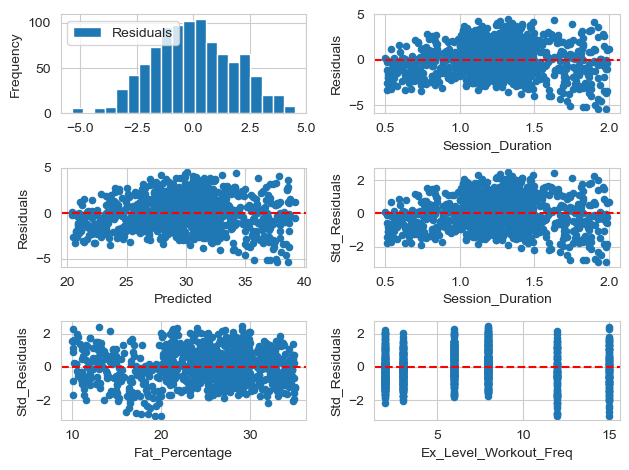

In [350]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Session_Duration", y = "Std_Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage", y = "Std_Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Ex_Level_Workout_Freq", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [351]:
formula = "Calories_Burned_SQRT ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 13113.2824, Std = 388.1576
Test_MSE: Mean = 13214.6342, Std = 1517.4086
Train_RMSE: Mean = 114.5005, Std = 1.7059
Test_RMSE: Mean = 114.7748, Std = 6.4319
Train_MAE: Mean = 90.0172, Std = 1.0209
Test_MAE: Mean = 90.3454, Std = 3.9863
Train_R2: Mean = 0.8234, Std = 0.0048
Test_R2: Mean = 0.8217, Std = 0.0172
Train_RSE: Mean = 114.7959, Std = 1.7102
Test_RSE: Mean = 115.9729, Std = 6.4977


In [352]:
residuals = model0.resid
exog = model0.model.exog

white_test = het_white(residuals, exog)
print(f"LM Statistic: {white_test[0]}, p-value: {white_test[1]}")

LM Statistic: 62.20222872065502, p-value: 5.035375841413689e-10


In [353]:
predictors = ["Session_Duration", "Fat_Percentage", "Ex_Level_Workout_Freq", "Avg_BPM", "Water_Intake"]
X = data[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

                 Feature       VIF
1       Session_Duration  2.433541
2         Fat_Percentage  2.665110
3  Ex_Level_Workout_Freq  3.068537
4                Avg_BPM  1.001665
5           Water_Intake  1.559690


In [354]:
model0 = smf.ols(formula="Calories_Burned ~ Session_Duration + Fat_Percentage +  Ex_Level_Workout_Freq + Avg_BPM + Water_Intake", 
                 data=data).fit()
data["Predicted"] = model0.predict()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3256.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:59:14   Log-Likelihood:                -5435.1
No. Observations:                 973   AIC:                         1.088e+04
Df Residuals:                     967   BIC:                         1.091e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -856.93

In [355]:
data["Residuals"] = data["Calories_Burned"] - data["Predicted"]
std_residuals = data["Residuals"].std()
data["Std_Residuals"] = data["Residuals"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...    VO2_Max  HRR  \
0                1.69           1313.0             3  ...  45.900000  120   
1                1.30            883.0             1  ...  41.495455  113   
2                1.11            677.0             0  ...  47.316667  113   
3                0.59            532.0             2  ...  51.910714  134   
4                0.64            556.0             2  ...  42.300000  120   
..                ...              ...           ...  ...        ...  ...   
968              1.57           1364.0             2  ...  42.702985  120   
969              1.38           1260.0             2  ...  50.271429  128   
970              1.72            929.0             0  ...  56.003774  141   
971              1.10            883.0             1  ...  48.861290  136   
972              0.75            542.0             2  ...  38.481818  100   

     Water_Intake_Session_Duration  Fat_In_Kg  BMI_Label  \
0                         2.071006    11.1258          1   
1                         1.615385    25.3911          1   
2                         2.072072    22.7454          0   
3                         3.559322    15.3216          3   
4                         4.375000    13.4612          3   
..                             ...        ...        ...   
968                       2.229299     8.7100          2   
969                       2.173913    16.6500          2   
970                       1.569767    11.3552          0   
971                       1.909091    35.6448          1   
972                       4.666667    25.5456          1   

     Session_Duration_Workout_Frequency    Predicted   Residuals  \
0                                  6.76  1342.779120  -29.779120   
1                                  5.20   926.891214  -43.891214   
2                                  4.44   624.228192   52.771808   
3                                  1.77   545.352259  -13.352259   
4                                  1.92   568.662794  -12.662794   
..                                  ...          ...         ...   
968                                6.28  1273.296067   90.703933   
969                                2.76  1160.147458   99.852542   
970                                8.60  1074.123184 -145.123184   
971                                3.30   781.673953  101.326047   
972                                1.50   603.132958  -61.132958   

     Std_Residuals  Calories_Burned_SQRT  
0        -0.461311             36.235342  
1        -0.679923             29.715316  
2         0.817493             26.019224  
3        -0.206841             23.065125  
4        -0.196160             23.579652  
..             ...                   ...  
968       1.405102             36.932371  
969       1.546824             35.496479  
970      -2.248116             30.479501  
971       1.569651             29.715316  
972      -0.947016             23.280893  

[973 rows x 26 columns]

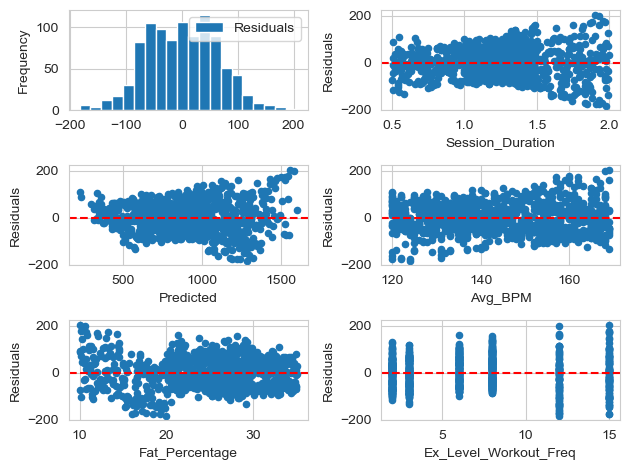

In [356]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data.plot(x = "Ex_Level_Workout_Freq", y = "Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [357]:
formula = "Calories_Burned ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq + Avg_BPM + Water_Intake"
results = cross_validate_model_with_train_test(data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 4156.9426, Std = 82.2717
Test_MSE: Mean = 4215.4592, Std = 330.3219
Train_RMSE: Mean = 64.4712, Std = 0.6340
Test_RMSE: Mean = 64.8741, Std = 2.6099
Train_MAE: Mean = 52.9746, Std = 0.5743
Test_MAE: Mean = 53.3299, Std = 1.9097
Train_R2: Mean = 0.9440, Std = 0.0017
Test_R2: Mean = 0.9428, Std = 0.0066
Train_RSE: Mean = 64.7212, Std = 0.6364
Test_RSE: Mean = 65.8979, Std = 2.6497


In [358]:
columns_to_scale = ["Session_Duration", "Fat_Percentage", "Ex_Level_Workout_Freq", "Avg_BPM", "Water_Intake"]
scaled_data = pd.DataFrame(scaler.fit_transform(data.loc[:, columns_to_scale]), columns=columns_to_scale)
scaled_data["Calories_Burned"] = data["Calories_Burned"]
scaled_data["Calories_Burned_SQRT"] = data["Calories_Burned_SQRT"]
scaled_data

Session_Duration  Fat_Percentage  Ex_Level_Workout_Freq   Avg_BPM  \
0            1.264598       -1.978321               1.306226  0.922970   
1            0.127098        1.426301               0.342832  0.504494   
2           -0.427068        1.346380               0.342832 -1.518142   
3           -1.943735        0.611110              -0.861411  1.411193   
4           -1.797902        0.675047              -0.861411  0.992716   
..                ...             ...                    ...       ...   
968          0.914598       -2.393908               1.306226  0.992716   
969          0.360432        0.003713              -1.102259  1.550685   
970          1.352098       -0.987304               2.028771 -1.657634   
971         -0.456235        0.515205              -0.138865  0.155764   
972         -1.477068        0.611110              -1.102259  0.155764   

     Water_Intake  Calories_Burned  Calories_Burned_SQRT  
0        1.455967           1313.0             36.235342  
1       -0.877898            883.0             29.715316  
2       -0.544488            677.0             26.019224  
3       -0.877898            532.0             23.065125  
4        0.289035            556.0             23.579652  
..            ...              ...                   ...  
968      1.455967           1364.0             36.932371  
969      0.622444           1260.0             35.496479  
970      0.122330            929.0             30.479501  
971     -0.877898            883.0             29.715316  
972      1.455967            542.0             23.280893  

[973 rows x 7 columns]

In [359]:
model0 = smf.ols(formula="Calories_Burned ~ Session_Duration + Fat_Percentage +  Ex_Level_Workout_Freq + Avg_BPM + Water_Intake", 
                 data=scaled_data).fit()
scaled_data["Predicted"] = model0.predict()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     3256.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:59:18   Log-Likelihood:                -5435.1
No. Observations:                 973   AIC:                         1.088e+04
Df Residuals:                     967   BIC:                         1.091e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               905.42

In [360]:
scaled_data["Residuals"] = scaled_data["Calories_Burned"] - scaled_data["Predicted"]
std_residuals = scaled_data["Residuals"].std()
scaled_data["Std_Residuals"] = scaled_data["Residuals"] / std_residuals
scaled_data

Session_Duration  Fat_Percentage  Ex_Level_Workout_Freq   Avg_BPM  \
0            1.264598       -1.978321               1.306226  0.922970   
1            0.127098        1.426301               0.342832  0.504494   
2           -0.427068        1.346380               0.342832 -1.518142   
3           -1.943735        0.611110              -0.861411  1.411193   
4           -1.797902        0.675047              -0.861411  0.992716   
..                ...             ...                    ...       ...   
968          0.914598       -2.393908               1.306226  0.992716   
969          0.360432        0.003713              -1.102259  1.550685   
970          1.352098       -0.987304               2.028771 -1.657634   
971         -0.456235        0.515205              -0.138865  0.155764   
972         -1.477068        0.611110              -1.102259  0.155764   

     Water_Intake  Calories_Burned  Calories_Burned_SQRT    Predicted  \
0        1.455967           1313.0             36.235342  1342.779120   
1       -0.877898            883.0             29.715316   926.891214   
2       -0.544488            677.0             26.019224   624.228192   
3       -0.877898            532.0             23.065125   545.352259   
4        0.289035            556.0             23.579652   568.662794   
..            ...              ...                   ...          ...   
968      1.455967           1364.0             36.932371  1273.296067   
969      0.622444           1260.0             35.496479  1160.147458   
970      0.122330            929.0             30.479501  1074.123184   
971     -0.877898            883.0             29.715316   781.673953   
972      1.455967            542.0             23.280893   603.132958   

      Residuals  Std_Residuals  
0    -29.779120      -0.461311  
1    -43.891214      -0.679923  
2     52.771808       0.817493  
3    -13.352259      -0.206841  
4    -12.662794      -0.196160  
..          ...            ...  
968   90.703933       1.405102  
969   99.852542       1.546824  
970 -145.123184      -2.248116  
971  101.326047       1.569651  
972  -61.132958      -0.947016  

[973 rows x 10 columns]

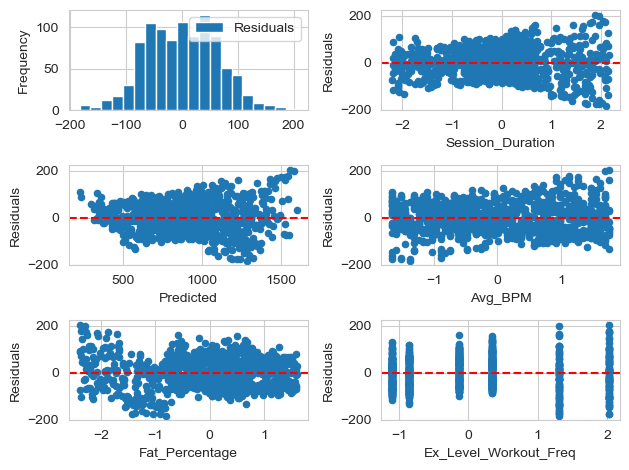

In [361]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
scaled_data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
scaled_data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Ex_Level_Workout_Freq", y = "Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [362]:
formula = "Calories_Burned ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq + Avg_BPM + Water_Intake"
results = cross_validate_model_with_train_test(scaled_data, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 4156.9426, Std = 82.2717
Test_MSE: Mean = 4215.4592, Std = 330.3219
Train_RMSE: Mean = 64.4712, Std = 0.6340
Test_RMSE: Mean = 64.8741, Std = 2.6099
Train_MAE: Mean = 52.9746, Std = 0.5743
Test_MAE: Mean = 53.3299, Std = 1.9097
Train_R2: Mean = 0.9440, Std = 0.0017
Test_R2: Mean = 0.9428, Std = 0.0066
Train_RSE: Mean = 64.7212, Std = 0.6364
Test_RSE: Mean = 65.8979, Std = 2.6497


In [363]:
residuals = model0.resid
exog = model0.model.exog

white_test = het_white(residuals, exog)
print(f"LM Statistic: {white_test[0]}, p-value: {white_test[1]}")

LM Statistic: 207.0795983945496, p-value: 4.451482765805782e-33


In [364]:
model0 = smf.ols(formula="Calories_Burned_SQRT ~ Session_Duration + Fat_Percentage +  Ex_Level_Workout_Freq + Avg_BPM + Water_Intake", 
                 data=scaled_data).fit()
scaled_data["Predicted"] = model0.predict()
print(model0.summary())

                             OLS Regression Results                             
Dep. Variable:     Calories_Burned_SQRT   R-squared:                       0.947
Model:                              OLS   Adj. R-squared:                  0.946
Method:                   Least Squares   F-statistic:                     3423.
Date:                  Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                          11:59:21   Log-Likelihood:                -1442.6
No. Observations:                   973   AIC:                             2897.
Df Residuals:                       967   BIC:                             2926.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

In [365]:
scaled_data["Residuals"] = scaled_data["Calories_Burned_SQRT"] - scaled_data["Predicted"]
std_residuals = scaled_data["Residuals"].std()
data["Std_Residuals"] = scaled_data["Residuals"] / std_residuals
scaled_data

Session_Duration  Fat_Percentage  Ex_Level_Workout_Freq   Avg_BPM  \
0            1.264598       -1.978321               1.306226  0.922970   
1            0.127098        1.426301               0.342832  0.504494   
2           -0.427068        1.346380               0.342832 -1.518142   
3           -1.943735        0.611110              -0.861411  1.411193   
4           -1.797902        0.675047              -0.861411  0.992716   
..                ...             ...                    ...       ...   
968          0.914598       -2.393908               1.306226  0.992716   
969          0.360432        0.003713              -1.102259  1.550685   
970          1.352098       -0.987304               2.028771 -1.657634   
971         -0.456235        0.515205              -0.138865  0.155764   
972         -1.477068        0.611110              -1.102259  0.155764   

     Water_Intake  Calories_Burned  Calories_Burned_SQRT  Predicted  \
0        1.455967           1313.0             36.235342  36.830519   
1       -0.877898            883.0             29.715316  30.404635   
2       -0.544488            677.0             26.019224  25.209929   
3       -0.877898            532.0             23.065125  23.366099   
4        0.289035            556.0             23.579652  23.830238   
..            ...              ...                   ...        ...   
968      1.455967           1364.0             36.932371  35.477468   
969      0.622444           1260.0             35.496479  34.174246   
970      0.122330            929.0             30.479501  32.548864   
971     -0.877898            883.0             29.715316  27.658185   
972      1.455967            542.0             23.280893  24.527733   

     Residuals  Std_Residuals  
0    -0.595177      -0.461311  
1    -0.689319      -0.679923  
2     0.809295       0.817493  
3    -0.300974      -0.206841  
4    -0.250586      -0.196160  
..         ...            ...  
968   1.454902       1.405102  
969   1.322233       1.546824  
970  -2.069363      -2.248116  
971   2.057131       1.569651  
972  -1.246839      -0.947016  

[973 rows x 10 columns]

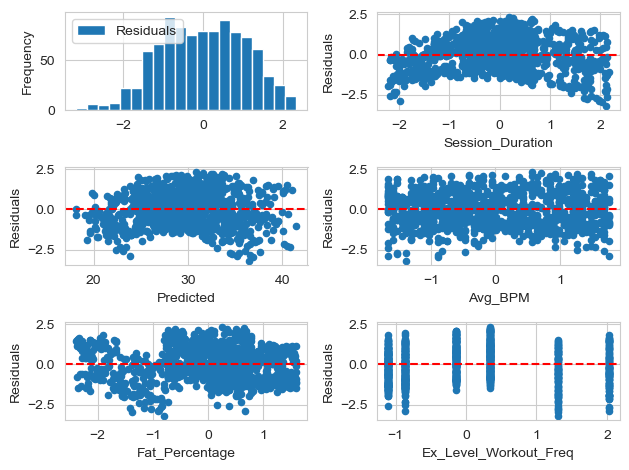

In [366]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
scaled_data.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
scaled_data.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
scaled_data.plot(x = "Ex_Level_Workout_Freq", y = "Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [367]:
formula = "Calories_Burned_SQRT ~ Session_Duration + Fat_Percentage + Ex_Level_Workout_Freq + Avg_BPM + Water_Intake"
results = cross_validate_model_with_train_test(scaled_data, formula, "Calories_Burned_SQRT")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 4309.1710, Std = 62.9986
Test_MSE: Mean = 4364.6130, Std = 325.8664
Train_RMSE: Mean = 65.6425, Std = 0.4806
Test_RMSE: Mean = 66.0190, Std = 2.4715
Train_MAE: Mean = 53.6938, Std = 0.4925
Test_MAE: Mean = 53.9732, Std = 1.9214
Train_R2: Mean = 0.9419, Std = 0.0015
Test_R2: Mean = 0.9408, Std = 0.0065
Train_RSE: Mean = 65.8970, Std = 0.4825
Test_RSE: Mean = 67.0609, Std = 2.5102


In [368]:
residuals = model0.resid
exog = model0.model.exog

white_test = het_white(residuals, exog)
print(f"LM Statistic: {white_test[0]}, p-value: {white_test[1]}")

LM Statistic: 172.93091897478016, p-value: 2.3305077059676415e-26


In [369]:
columns = [
    "Session_Duration", "Fat_Percentage", "Avg_BPM", "Water_Intake", "Age", "BMI", 
    "Max_BPM", "Resting_BPM", "Workout_Type", "Gender", "Weight", "Height", 
    "Experience_Level", "Workout_Frequency", "HRR", "VO2_Max", "Fat_In_Kg", 
    "Water_Intake_Session_Duration", "Ex_Level_Workout_Freq", "BMI_Label", 
    "Session_Duration_Workout_Frequency"
]

X = data[columns]
Y = data["Calories_Burned"]

max_degree = 8 

for col in ["Session_Duration", "Fat_Percentage", "Avg_BPM", "Water_Intake"]:
    for degree in range(2, max_degree + 1):
        X[f"{col}_{degree}"] = X[col] ** degree

data_pom = pd.concat([X, Y], axis=1)

exclude_from_scaling = ["Gender", "Experience_Level", "BMI_Label", "Workout_Frequency", "Ex_Level_Workout_Freq", "Workout_Type"]
columns_to_scale = [col for col in X.columns if col not in exclude_from_scaling]

scaler = StandardScaler()
data_pom[columns_to_scale] = scaler.fit_transform(data_pom[columns_to_scale])

vars = set(X.columns)
pvalue_threshold = 0.01
highest_pvalue = 0.10
intercept = True

while (len(vars) > 0) and (highest_pvalue > pvalue_threshold):
    formula = "Calories_Burned ~ {}".format(" + ".join(vars)) 
    if not intercept:
        formula += " - 1"
    test_model = smf.ols(formula, data_pom).fit()
    pvalues = test_model.pvalues
    highest_pvalue = max(pvalues)
    if highest_pvalue > pvalue_threshold:
        if pvalues.idxmax() == "Intercept":
            intercept = False
        else:
            vars.remove(pvalues.idxmax())

print("Selected variables:", vars)

X = data_pom[list(vars)]
X = sm.add_constant(X)

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print("VIF:")
print(vif_data)


Selected variables: {'Avg_BPM_5', 'Age', 'Session_Duration_5', 'Gender', 'Fat_Percentage', 'Avg_BPM_4', 'Water_Intake_4', 'Fat_Percentage_2', 'Session_Duration_3', 'Session_Duration', 'Water_Intake_Session_Duration', 'Session_Duration_2', 'Session_Duration_4'}
VIF:
                          Feature           VIF
1                       Avg_BPM_5  5.829888e+02
2                             Age  1.014532e+00
3              Session_Duration_5  8.046940e+05
4                          Gender  2.506148e+00
5                  Fat_Percentage  8.785850e+01
6                       Avg_BPM_4  5.829641e+02
7                  Water_Intake_4  7.307633e+00
8                Fat_Percentage_2  7.219106e+01
9              Session_Duration_3  1.232773e+07
10               Session_Duration  1.811485e+05
11  Water_Intake_Session_Duration  1.482613e+01
12             Session_Duration_2  3.810642e+06
13             Session_Duration_4  8.297501e+06


In [370]:
data_pom["Calories_Burned_SQRT"] = data["Calories_Burned_SQRT"]

In [371]:
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  Avg_BPM_8  \
0    0.794278  0.010081    -0.303555             3       1  ...   0.752238   
1    1.064652 -0.076726     0.515749             1       0  ...   0.191455   
2   -0.030361 -1.118414    -1.122858             0       0  ...  -1.063273   
3   -0.976669  0.878155    -0.849757             2       1  ...   1.626646   
4   -1.580503  0.704540     0.788850             2       1  ...   0.861342   
..        ...       ...          ...           ...     ...  ...        ...   
968  0.579482  0.617733     0.652299             2       1  ...   0.861342   
969  0.116842  0.357311    -0.849757             2       1  ...   1.928902   
970 -0.812942  1.225384    -1.259409             0       0  ...  -1.097754   
971  1.926843  1.572614    -0.030454             1       1  ...  -0.170591   
972  1.271938 -1.205221     0.515749             2       1  ...  -0.170591   

     Water_Intake_2  Water_Intake_3  Water_Intake_4  Water_Intake_5  \
0          1.561316        1.642463        1.701594        1.742226   
1         -0.891223       -0.878212       -0.848604       -0.810711   
2         -0.615938       -0.660295       -0.681942       -0.686735   
3         -0.891223       -0.878212       -0.848604       -0.810711   
4          0.181763        0.073471       -0.028228       -0.118884   
..              ...             ...             ...             ...   
968        1.561316        1.642463        1.701594        1.742226   
969        0.544638        0.452015        0.353174        0.254778   
970        0.009709       -0.096678       -0.190702       -0.269699   
971       -0.891223       -0.878212       -0.848604       -0.810711   
972        1.561316        1.642463        1.701594        1.742226   

     Water_Intake_6  Water_Intake_7  Water_Intake_8  Calories_Burned  \
0          1.767898        1.781598        1.785650           1313.0   
1         -0.770394       -0.731204       -0.694961            883.0   
2         -0.680204       -0.666765       -0.649598            677.0   
3         -0.770394       -0.731204       -0.694961            532.0   
4         -0.196654       -0.261423       -0.314050            556.0   
..              ...             ...             ...              ...   
968        1.767898        1.781598        1.785650           1364.0   
969        0.161255        0.075170       -0.002247           1260.0   
970       -0.333483       -0.383272       -0.420905            929.0   
971       -0.770394       -0.731204       -0.694961            883.0   
972        1.767898        1.781598        1.785650            542.0   

     Calories_Burned_SQRT  
0               36.235342  
1               29.715316  
2               26.019224  
3               23.065125  
4               23.579652  
..                    ...  
968             36.932371  
969             35.496479  
970             30.479501  
971             29.715316  
972             23.280893  

[973 rows x 51 columns]

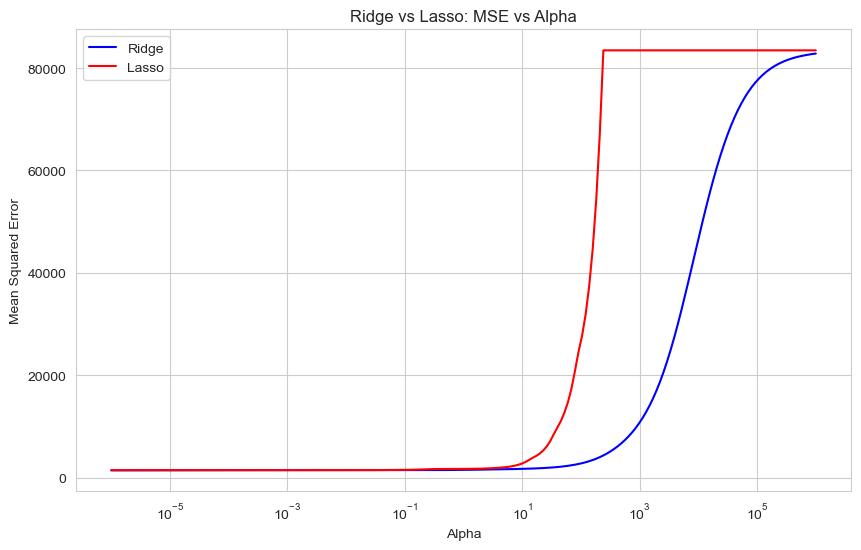

In [372]:
selected_variables = {
    "Water_Intake_4", "Fat_Percentage", "Avg_BPM_5", "Session_Duration_2", 
    "Session_Duration_5", "Water_Intake_Session_Duration", "Session_Duration", 
    "Age", "Session_Duration_4", "Session_Duration_3", "Fat_Percentage_2", 
    "Gender", "Avg_BPM_4"
}

X = data_pom[list(selected_variables)]
y = data_pom['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-6, 6, 200)

ridge_mse = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)

lasso_mse = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_mse.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mse, label='Ridge', color='blue')
plt.plot(alphas, lasso_mse, label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge vs Lasso: MSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [373]:
lasso = Lasso(alpha=8).fit(X, y)
coefficients = lasso.coef_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

non_zero_features = coef_df[coef_df['Coefficient'] != 0]

print(non_zero_features)

             Feature  Coefficient
1          Avg_BPM_4    80.977927
5     Water_Intake_4    11.258761
6                Age   -32.733719
10            Gender    36.732908
11  Session_Duration   231.271656
12    Fat_Percentage    -5.871225


In [374]:
data_pom["Predicted"] = lasso.predict(X)
data_pom["Residuals"] = data_pom["Calories_Burned"] - data_pom["Predicted"]
std_residuals = data_pom["Residuals"].std()
data_pom["Std_Residuals"] = data_pom["Residuals"] / std_residuals
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  \
0    0.794278  0.010081    -0.303555             3       1  ...   
1    1.064652 -0.076726     0.515749             1       0  ...   
2   -0.030361 -1.118414    -1.122858             0       0  ...   
3   -0.976669  0.878155    -0.849757             2       1  ...   
4   -1.580503  0.704540     0.788850             2       1  ...   
..        ...       ...          ...           ...     ...  ...   
968  0.579482  0.617733     0.652299             2       1  ...   
969  0.116842  0.357311    -0.849757             2       1  ...   
970 -0.812942  1.225384    -1.259409             0       0  ...   
971  1.926843  1.572614    -0.030454             1       1  ...   
972  1.271938 -1.205221     0.515749             2       1  ...   

     Water_Intake_4  Water_Intake_5  Water_Intake_6  Water_Intake_7  \
0          1.701594        1.742226        1.767898        1.781598   
1         -0.848604       -0.810711       -0.770394       -0.731204   
2         -0.681942       -0.686735       -0.680204       -0.666765   
3         -0.848604       -0.810711       -0.770394       -0.731204   
4         -0.028228       -0.118884       -0.196654       -0.261423   
..              ...             ...             ...             ...   
968        1.701594        1.742226        1.767898        1.781598   
969        0.353174        0.254778        0.161255        0.075170   
970       -0.190702       -0.269699       -0.333483       -0.383272   
971       -0.848604       -0.810711       -0.770394       -0.731204   
972        1.701594        1.742226        1.767898        1.781598   

     Water_Intake_8  Calories_Burned  Calories_Burned_SQRT    Predicted  \
0          1.785650           1313.0             36.235342  1270.226262   
1         -0.694961            883.0             29.715316   908.531407   
2         -0.649598            677.0             26.019224   683.999712   
3         -0.694961            532.0             23.065125   620.597348   
4         -0.314050            556.0             23.579652   582.441326   
..              ...              ...                   ...          ...   
968        1.785650           1364.0             36.932371  1284.901288   
969       -0.002247           1260.0             35.496479  1187.007340   
970       -0.420905            929.0             30.479501  1035.630945   
971       -0.694961            883.0             29.715316   823.404833   
972        1.785650            542.0             23.280893   577.822576   

      Residuals  Std_Residuals  
0     42.773738       0.905449  
1    -25.531407      -0.540457  
2     -6.999712      -0.148172  
3    -88.597348      -1.875458  
4    -26.441326      -0.559719  
..          ...            ...  
968   79.098712       1.674388  
969   72.992660       1.545133  
970 -106.630945      -2.257199  
971   59.595167       1.261530  
972  -35.822576      -0.758304  

[973 rows x 54 columns]

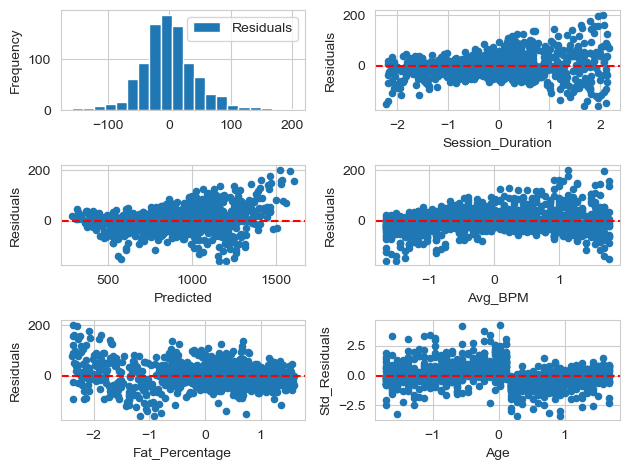

In [375]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data_pom.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data_pom.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Age", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [376]:
results = cross_validate_model_with_train_test_regularization(X, lasso, y)

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 2225.1732, Std = 27.5714
Test_MSE: Mean = 2277.0810, Std = 165.4645
Train_RMSE: Mean = 47.1708, Std = 0.2926
Test_RMSE: Mean = 47.6875, Std = 1.7267
Train_MAE: Mean = 34.7976, Std = 0.2102
Test_MAE: Mean = 35.1566, Std = 0.6971
Train_R2: Mean = 0.9700, Std = 0.0006
Test_R2: Mean = 0.9692, Std = 0.0027
Train_RSE: Mean = 47.6008, Std = 0.2954
Test_RSE: Mean = 49.5013, Std = 1.7901


In [377]:
ridge = Ridge(alpha=10).fit(X, y)
coefficients = ridge.coef_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

non_zero_features = coef_df[coef_df['Coefficient'] != 0]

print(non_zero_features)

                          Feature  Coefficient
0   Water_Intake_Session_Duration   -40.193941
1                       Avg_BPM_4    70.892899
2                       Avg_BPM_5    17.453791
3              Session_Duration_2    74.756400
4              Session_Duration_4     0.593818
5                  Water_Intake_4    25.853869
6                             Age   -39.704679
7              Session_Duration_5   -22.904661
8                Fat_Percentage_2     9.879514
9              Session_Duration_3    33.234867
10                         Gender    82.836478
11               Session_Duration   122.090207
12                 Fat_Percentage   -12.027073


In [378]:
data_pom["Predicted"] = ridge.predict(X)
data_pom["Residuals"] = data_pom["Calories_Burned"] - data_pom["Predicted"]
std_residuals = data_pom["Residuals"].std()
data_pom["Std_Residuals"] = data_pom["Residuals"] / std_residuals
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  \
0    0.794278  0.010081    -0.303555             3       1  ...   
1    1.064652 -0.076726     0.515749             1       0  ...   
2   -0.030361 -1.118414    -1.122858             0       0  ...   
3   -0.976669  0.878155    -0.849757             2       1  ...   
4   -1.580503  0.704540     0.788850             2       1  ...   
..        ...       ...          ...           ...     ...  ...   
968  0.579482  0.617733     0.652299             2       1  ...   
969  0.116842  0.357311    -0.849757             2       1  ...   
970 -0.812942  1.225384    -1.259409             0       0  ...   
971  1.926843  1.572614    -0.030454             1       1  ...   
972  1.271938 -1.205221     0.515749             2       1  ...   

     Water_Intake_4  Water_Intake_5  Water_Intake_6  Water_Intake_7  \
0          1.701594        1.742226        1.767898        1.781598   
1         -0.848604       -0.810711       -0.770394       -0.731204   
2         -0.681942       -0.686735       -0.680204       -0.666765   
3         -0.848604       -0.810711       -0.770394       -0.731204   
4         -0.028228       -0.118884       -0.196654       -0.261423   
..              ...             ...             ...             ...   
968        1.701594        1.742226        1.767898        1.781598   
969        0.353174        0.254778        0.161255        0.075170   
970       -0.190702       -0.269699       -0.333483       -0.383272   
971       -0.848604       -0.810711       -0.770394       -0.731204   
972        1.701594        1.742226        1.767898        1.781598   

     Water_Intake_8  Calories_Burned  Calories_Burned_SQRT    Predicted  \
0          1.785650           1313.0             36.235342  1295.147147   
1         -0.694961            883.0             29.715316   894.951566   
2         -0.649598            677.0             26.019224   661.328206   
3         -0.694961            532.0             23.065125   665.592258   
4         -0.314050            556.0             23.579652   579.512789   
..              ...              ...                   ...          ...   
968        1.785650           1364.0             36.932371  1323.141713   
969       -0.002247           1260.0             35.496479  1222.240837   
970       -0.420905            929.0             30.479501   994.051942   
971       -0.694961            883.0             29.715316   854.820886   
972        1.785650            542.0             23.280893   554.541736   

      Residuals  Std_Residuals  
0     17.852853       0.432935  
1    -11.951566      -0.289828  
2     15.671794       0.380044  
3   -133.592258      -3.239637  
4    -23.512789      -0.570189  
..          ...            ...  
968   40.858287       0.990821  
969   37.759163       0.915667  
970  -65.051942      -1.577522  
971   28.179114       0.683349  
972  -12.541736      -0.304139  

[973 rows x 54 columns]

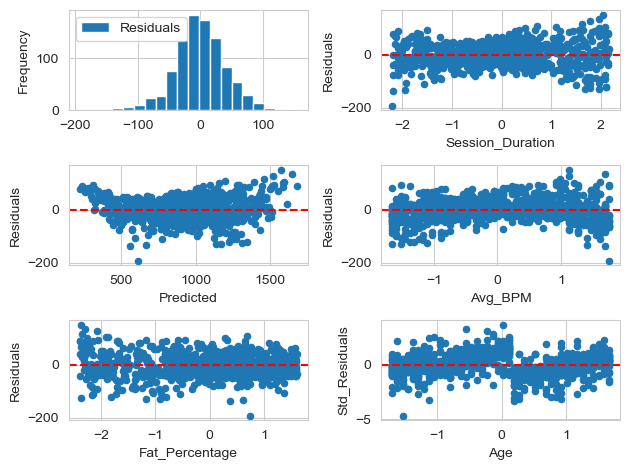

In [379]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data_pom.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data_pom.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Age", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [380]:
results = cross_validate_model_with_train_test_regularization(X, ridge, y)

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 1711.0102, Std = 25.7189
Test_MSE: Mean = 1766.0747, Std = 94.9705
Train_RMSE: Mean = 41.3632, Std = 0.3111
Test_RMSE: Mean = 42.0098, Std = 1.1189
Train_MAE: Mean = 31.5726, Std = 0.1590
Test_MAE: Mean = 32.0172, Std = 0.7200
Train_R2: Mean = 0.9769, Std = 0.0006
Test_R2: Mean = 0.9761, Std = 0.0022
Train_RSE: Mean = 41.7403, Std = 0.3139
Test_RSE: Mean = 43.6077, Std = 1.1596


In [381]:
y = data_pom['Calories_Burned_SQRT']

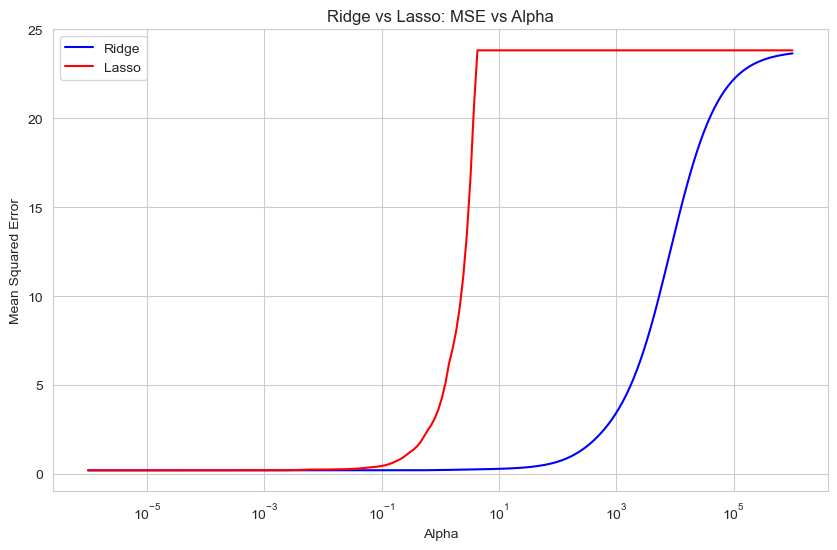

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-6, 6, 200)

ridge_mse = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    ridge_mse.append(mse)

lasso_mse = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_mse.append(mse)

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_mse, label='Ridge', color='blue')
plt.plot(alphas, lasso_mse, label='Lasso', color='red')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge vs Lasso: MSE vs Alpha')
plt.legend()
plt.grid(True)
plt.show()

In [383]:
lasso = Lasso(alpha=0.01).fit(X, y)
coefficients = lasso.coef_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

non_zero_features = coef_df[coef_df['Coefficient'] != 0]

print(non_zero_features)

                          Feature  Coefficient
0   Water_Intake_Session_Duration    -0.475222
1                       Avg_BPM_4     1.445586
5                  Water_Intake_4     0.281243
6                             Age    -0.645245
7              Session_Duration_5    -0.419923
10                         Gender     1.413401
11               Session_Duration     4.136412


In [384]:
data_pom["Predicted"] = lasso.predict(X)
data_pom["Residuals"] = data_pom["Calories_Burned_SQRT"] - data_pom["Predicted"]
std_residuals = data_pom["Residuals"].std()
data_pom["Std_Residuals"] = data_pom["Residuals"] / std_residuals
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  \
0    0.794278  0.010081    -0.303555             3       1  ...   
1    1.064652 -0.076726     0.515749             1       0  ...   
2   -0.030361 -1.118414    -1.122858             0       0  ...   
3   -0.976669  0.878155    -0.849757             2       1  ...   
4   -1.580503  0.704540     0.788850             2       1  ...   
..        ...       ...          ...           ...     ...  ...   
968  0.579482  0.617733     0.652299             2       1  ...   
969  0.116842  0.357311    -0.849757             2       1  ...   
970 -0.812942  1.225384    -1.259409             0       0  ...   
971  1.926843  1.572614    -0.030454             1       1  ...   
972  1.271938 -1.205221     0.515749             2       1  ...   

     Water_Intake_4  Water_Intake_5  Water_Intake_6  Water_Intake_7  \
0          1.701594        1.742226        1.767898        1.781598   
1         -0.848604       -0.810711       -0.770394       -0.731204   
2         -0.681942       -0.686735       -0.680204       -0.666765   
3         -0.848604       -0.810711       -0.770394       -0.731204   
4         -0.028228       -0.118884       -0.196654       -0.261423   
..              ...             ...             ...             ...   
968        1.701594        1.742226        1.767898        1.781598   
969        0.353174        0.254778        0.161255        0.075170   
970       -0.190702       -0.269699       -0.333483       -0.383272   
971       -0.848604       -0.810711       -0.770394       -0.731204   
972        1.701594        1.742226        1.767898        1.781598   

     Water_Intake_8  Calories_Burned  Calories_Burned_SQRT  Predicted  \
0          1.785650           1313.0             36.235342  36.076163   
1         -0.694961            883.0             29.715316  29.909114   
2         -0.649598            677.0             26.019224  25.841160   
3         -0.694961            532.0             23.065125  24.676329   
4         -0.314050            556.0             23.579652  23.552009   
..              ...              ...                   ...        ...   
968        1.785650           1364.0             36.932371  36.618855   
969       -0.002247           1260.0             35.496479  35.306971   
970       -0.420905            929.0             30.479501  31.268724   
971       -0.694961            883.0             29.715316  29.081020   
972        1.785650            542.0             23.280893  23.395609   

     Residuals  Std_Residuals  
0     0.159179       0.293196  
1    -0.193798      -0.356962  
2     0.178063       0.327980  
3    -1.611204      -2.967721  
4     0.027644       0.050918  
..         ...            ...  
968   0.313516       0.577473  
969   0.189507       0.349059  
970  -0.789222      -1.453691  
971   0.634296       1.168327  
972  -0.114716      -0.211299  

[973 rows x 54 columns]

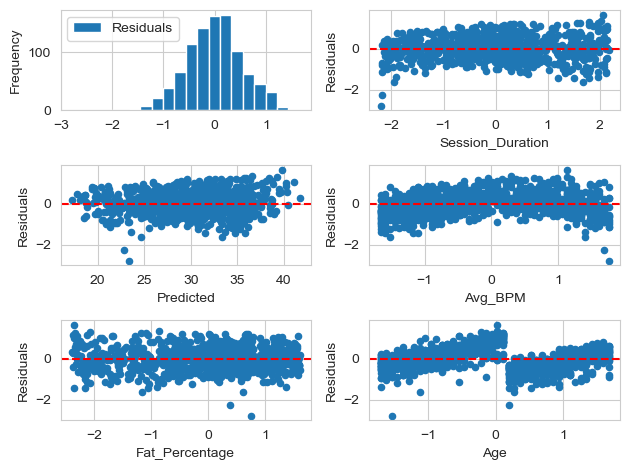

In [385]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data_pom.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data_pom.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Age", y = "Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [386]:
results = cross_validate_model_with_train_test_regularization(X, lasso, y)

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 1114.9906, Std = 30.5975
Test_MSE: Mean = 1142.1902, Std = 102.6361
Train_RMSE: Mean = 33.3884, Std = 0.4556
Test_RMSE: Mean = 33.7603, Std = 1.5587
Train_MAE: Mean = 25.6882, Std = 0.4151
Test_MAE: Mean = 25.9268, Std = 1.4715
Train_R2: Mean = 0.9850, Std = 0.0006
Test_R2: Mean = 0.9845, Std = 0.0021
Train_RSE: Mean = 33.6927, Std = 0.4599
Test_RSE: Mean = 35.0446, Std = 1.6199


In [387]:
ridge = Ridge(alpha=15).fit(X, y)
coefficients = ridge.coef_

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

non_zero_features = coef_df[coef_df['Coefficient'] != 0]

print(non_zero_features)

                          Feature  Coefficient
0   Water_Intake_Session_Duration    -0.894671
1                       Avg_BPM_4     1.056040
2                       Avg_BPM_5     0.388582
3              Session_Duration_2     1.270849
4              Session_Duration_4    -0.221170
5                  Water_Intake_4     0.543705
6                             Age    -0.634316
7              Session_Duration_5    -0.580634
8                Fat_Percentage_2    -0.129220
9              Session_Duration_3     0.373607
10                         Gender     1.362898
11               Session_Duration     2.490692
12                 Fat_Percentage     0.139669


In [388]:
data_pom["Predicted"] = ridge.predict(X)
data_pom["Residuals"] = data_pom["Calories_Burned_SQRT"] - data_pom["Predicted"]
std_residuals = data_pom["Residuals"].std()
data_pom["Std_Residuals"] = data_pom["Residuals"] / std_residuals
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  \
0    0.794278  0.010081    -0.303555             3       1  ...   
1    1.064652 -0.076726     0.515749             1       0  ...   
2   -0.030361 -1.118414    -1.122858             0       0  ...   
3   -0.976669  0.878155    -0.849757             2       1  ...   
4   -1.580503  0.704540     0.788850             2       1  ...   
..        ...       ...          ...           ...     ...  ...   
968  0.579482  0.617733     0.652299             2       1  ...   
969  0.116842  0.357311    -0.849757             2       1  ...   
970 -0.812942  1.225384    -1.259409             0       0  ...   
971  1.926843  1.572614    -0.030454             1       1  ...   
972  1.271938 -1.205221     0.515749             2       1  ...   

     Water_Intake_4  Water_Intake_5  Water_Intake_6  Water_Intake_7  \
0          1.701594        1.742226        1.767898        1.781598   
1         -0.848604       -0.810711       -0.770394       -0.731204   
2         -0.681942       -0.686735       -0.680204       -0.666765   
3         -0.848604       -0.810711       -0.770394       -0.731204   
4         -0.028228       -0.118884       -0.196654       -0.261423   
..              ...             ...             ...             ...   
968        1.701594        1.742226        1.767898        1.781598   
969        0.353174        0.254778        0.161255        0.075170   
970       -0.190702       -0.269699       -0.333483       -0.383272   
971       -0.848604       -0.810711       -0.770394       -0.731204   
972        1.701594        1.742226        1.767898        1.781598   

     Water_Intake_8  Calories_Burned  Calories_Burned_SQRT  Predicted  \
0          1.785650           1313.0             36.235342  36.166435   
1         -0.694961            883.0             29.715316  29.823396   
2         -0.649598            677.0             26.019224  25.821292   
3         -0.694961            532.0             23.065125  24.941721   
4         -0.314050            556.0             23.579652  23.483961   
..              ...              ...                   ...        ...   
968        1.785650           1364.0             36.932371  36.612507   
969       -0.002247           1260.0             35.496479  35.205101   
970       -0.420905            929.0             30.479501  31.246638   
971       -0.694961            883.0             29.715316  29.040519   
972        1.785650            542.0             23.280893  23.352013   

     Residuals  Std_Residuals  
0     0.068907       0.118355  
1    -0.108080      -0.185638  
2     0.197932       0.339967  
3    -1.876595      -3.223230  
4     0.095691       0.164359  
..         ...            ...  
968   0.319864       0.549396  
969   0.291378       0.500469  
970  -0.767137      -1.317630  
971   0.674797       1.159027  
972  -0.071120      -0.122155  

[973 rows x 54 columns]

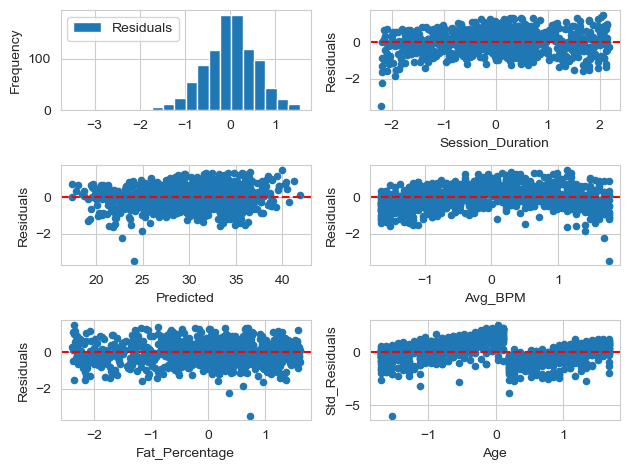

In [389]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data_pom.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data_pom.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Age", y = "Std_Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [390]:
results = cross_validate_model_with_train_test_regularization(X, ridge, y)

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 1273.0032, Std = 33.3824
Test_MSE: Mean = 1306.4992, Std = 88.1634
Train_RMSE: Mean = 35.6761, Std = 0.4644
Test_RMSE: Mean = 36.1238, Std = 1.2521
Train_MAE: Mean = 27.4661, Std = 0.3945
Test_MAE: Mean = 27.7032, Std = 1.1210
Train_R2: Mean = 0.9828, Std = 0.0007
Test_R2: Mean = 0.9822, Std = 0.0023
Train_RSE: Mean = 36.0014, Std = 0.4688
Test_RSE: Mean = 37.4979, Std = 1.3010


In [391]:
data_pom.columns

Index(['Session_Duration', 'Fat_Percentage', 'Avg_BPM', 'Water_Intake', 'Age',
       'BMI', 'Max_BPM', 'Resting_BPM', 'Workout_Type', 'Gender', 'Weight',
       'Height', 'Experience_Level', 'Workout_Frequency', 'HRR', 'VO2_Max',
       'Fat_In_Kg', 'Water_Intake_Session_Duration', 'Ex_Level_Workout_Freq',
       'BMI_Label', 'Session_Duration_Workout_Frequency', 'Session_Duration_2',
       'Session_Duration_3', 'Session_Duration_4', 'Session_Duration_5',
       'Session_Duration_6', 'Session_Duration_7', 'Session_Duration_8',
       'Fat_Percentage_2', 'Fat_Percentage_3', 'Fat_Percentage_4',
       'Fat_Percentage_5', 'Fat_Percentage_6', 'Fat_Percentage_7',
       'Fat_Percentage_8', 'Avg_BPM_2', 'Avg_BPM_3', 'Avg_BPM_4', 'Avg_BPM_5',
       'Avg_BPM_6', 'Avg_BPM_7', 'Avg_BPM_8', 'Water_Intake_2',
       'Water_Intake_3', 'Water_Intake_4', 'Water_Intake_5', 'Water_Intake_6',
       'Water_Intake_7', 'Water_Intake_8', 'Calories_Burned',
       'Calories_Burned_SQRT', 'Predicted', 'Re

In [392]:
predictors = ["Session_Duration", "Fat_Percentage", "Ex_Level_Workout_Freq", "Avg_BPM", "Water_Intake", "Age"]
X = data_pom[predictors]

X = sm.add_constant(X)  

vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data)

                 Feature       VIF
1       Session_Duration  2.434704
2         Fat_Percentage  2.666366
3  Ex_Level_Workout_Freq  3.068952
4                Avg_BPM  1.003051
5           Water_Intake  1.564004
6                    Age  1.004657


In [393]:
model0 = smf.ols(formula="Calories_Burned ~ Session_Duration * Water_Intake + Fat_Percentage + Ex_Level_Workout_Freq + Avg_BPM + Age", 
                 data=data_pom).fit()
data_pom["Predicted"] = model0.predict()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     4247.
Date:                Sat, 14 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:59:57   Log-Likelihood:                -5153.7
No. Observations:                 973   AIC:                         1.032e+04
Df Residuals:                     965   BIC:                         1.036e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [394]:
data_pom["Residuals"] = data_pom["Calories_Burned"] - data_pom["Predicted"]
std_residuals = data_pom["Residuals"].std()
data_pom["Std_Residuals"] = data_pom["Residuals"] / std_residuals
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  \
0    0.794278  0.010081    -0.303555             3       1  ...   
1    1.064652 -0.076726     0.515749             1       0  ...   
2   -0.030361 -1.118414    -1.122858             0       0  ...   
3   -0.976669  0.878155    -0.849757             2       1  ...   
4   -1.580503  0.704540     0.788850             2       1  ...   
..        ...       ...          ...           ...     ...  ...   
968  0.579482  0.617733     0.652299             2       1  ...   
969  0.116842  0.357311    -0.849757             2       1  ...   
970 -0.812942  1.225384    -1.259409             0       0  ...   
971  1.926843  1.572614    -0.030454             1       1  ...   
972  1.271938 -1.205221     0.515749             2       1  ...   

     Water_Intake_4  Water_Intake_5  Water_Intake_6  Water_Intake_7  \
0          1.701594        1.742226        1.767898        1.781598   
1         -0.848604       -0.810711       -0.770394       -0.731204   
2         -0.681942       -0.686735       -0.680204       -0.666765   
3         -0.848604       -0.810711       -0.770394       -0.731204   
4         -0.028228       -0.118884       -0.196654       -0.261423   
..              ...             ...             ...             ...   
968        1.701594        1.742226        1.767898        1.781598   
969        0.353174        0.254778        0.161255        0.075170   
970       -0.190702       -0.269699       -0.333483       -0.383272   
971       -0.848604       -0.810711       -0.770394       -0.731204   
972        1.701594        1.742226        1.767898        1.781598   

     Water_Intake_8  Calories_Burned  Calories_Burned_SQRT    Predicted  \
0          1.785650           1313.0             36.235342  1296.034801   
1         -0.694961            883.0             29.715316   901.672749   
2         -0.649598            677.0             26.019224   648.598769   
3         -0.694961            532.0             23.065125   611.535478   
4         -0.314050            556.0             23.579652   572.032284   
..              ...              ...                   ...          ...   
968        1.785650           1364.0             36.932371  1327.399040   
969       -0.002247           1260.0             35.496479  1212.666530   
970       -0.420905            929.0             30.479501   992.406875   
971       -0.694961            883.0             29.715316   804.882824   
972        1.785650            542.0             23.280893   565.832954   

     Residuals  Std_Residuals  
0    16.965199       0.350934  
1   -18.672749      -0.386255  
2    28.401231       0.587494  
3   -79.535478      -1.645231  
4   -16.032284      -0.331636  
..         ...            ...  
968  36.600960       0.757109  
969  47.333470       0.979117  
970 -63.406875      -1.311603  
971  78.117176       1.615893  
972 -23.832954      -0.492997  

[973 rows x 54 columns]

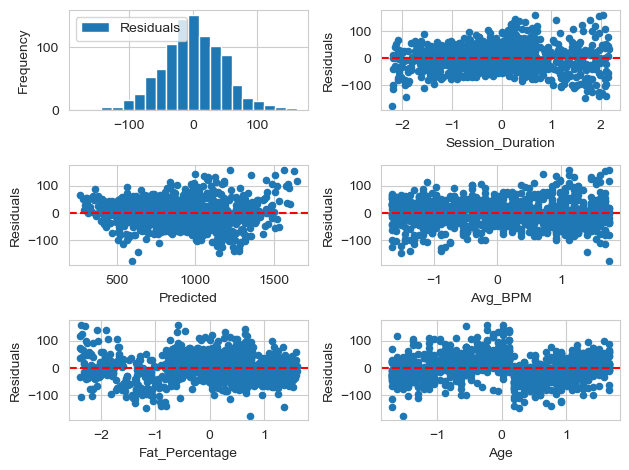

In [395]:
fig, ((g1, g2), (g3, g4), (g5, g6)) = plt.subplots(3,2)
data_pom.plot(y = "Residuals", kind = "hist", bins = 20, ax = g1)
data_pom.plot(x = "Session_Duration", y = "Residuals", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Predicted", y = "Residuals", kind = "scatter", ax = g3)
g3.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Avg_BPM", y = "Residuals", kind = "scatter", ax = g4)
g4.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Fat_Percentage", y = "Residuals", kind = "scatter", ax = g5)
g5.axhline(y = 0, c = "red", linestyle = "dashed")
data_pom.plot(x = "Age", y = "Residuals", kind = "scatter", ax = g6)
g6.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

In [396]:
formula = "Calories_Burned ~ Session_Duration * Water_Intake + Fat_Percentage + Ex_Level_Workout_Freq + Avg_BPM + Age"
results = cross_validate_model_with_train_test(data_pom, formula, "Calories_Burned")

for metric, (mean, std) in results.items():
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

Train_MSE: Mean = 2328.1116, Std = 41.3079
Test_MSE: Mean = 2394.2075, Std = 147.3888
Train_RMSE: Mean = 48.2486, Std = 0.4291
Test_RMSE: Mean = 48.9079, Std = 1.4923
Train_MAE: Mean = 37.4741, Std = 0.3495
Test_MAE: Mean = 38.0073, Std = 0.8455
Train_R2: Mean = 0.9686, Std = 0.0010
Test_R2: Mean = 0.9675, Std = 0.0036
Train_RSE: Mean = 48.4985, Std = 0.4313
Test_RSE: Mean = 49.9453, Std = 1.5231


In [397]:
#IZVEZI OVAJ MODEL

In [398]:
scaler_mean = scaler.mean_
scaler_std = scaler.scale_

scaled_columns = ["Session_Duration", "Water_Intake", "Session_Duration:Water_Intake", "Fat_Percentage", "Age"]

scaled_coefficients = {
    "Intercept": 928.6968,
    "Session_Duration": 238.7658,
    "Water_Intake": 27.9653,
    "Session_Duration:Water_Intake": 10.9240,
    "Fat_Percentage": -14.1934,
    "Ex_Level_Workout_Freq": -4.0097,
    "Avg_BPM": 90.1605,
    "Age": -41.2082
}

confidence_intervals = {
    "Intercept": [919.693, 937.700],
    "Session_Duration": [234.001, 243.531],
    "Water_Intake": [24.071, 31.859],
    "Session_Duration:Water_Intake": [7.401, 14.447],
    "Fat_Percentage": [-19.358, -9.029],
    "Ex_Level_Workout_Freq": [-5.308, -2.711],
    "Avg_BPM": [87.103, 93.218],
    "Age": [-44.274, -38.143]
}

original_coefficients = []
intercept = scaled_coefficients["Intercept"]

for i, column in enumerate(scaled_columns):
    coef_scaled = scaled_coefficients[column]
    ci_scaled = confidence_intervals[column]

    coef_original = coef_scaled / scaler_std[i]
    ci_original = [ci / scaler_std[i] for ci in ci_scaled]

    intercept -= coef_scaled * scaler_mean[i] / scaler_std[i]

    original_coefficients.append({
        "predictor": column,
        "coefficient": coef_original,
        "confidence_interval": ci_original
    })

for column in scaled_coefficients:
    if column not in scaled_columns and column != "Intercept":
        original_coefficients.append({
            "predictor": column,
            "coefficient": scaled_coefficients[column],
            "confidence_interval": confidence_intervals[column]
        })

model_data = {
    "intercept": intercept,
    "coefficients": original_coefficients
}

model_data
with open("linear_model_original.json", "w") as f:
    json.dump(model_data, f, indent=4)

print("JSON saved")


JSON saved


In [399]:
data_pom

Session_Duration  Fat_Percentage   Avg_BPM  Water_Intake       Age  \
0            1.264598       -1.978321  0.922970      1.455967  1.422343   
1            0.127098        1.426301  0.504494     -0.877898  0.600965   
2           -0.427068        1.346380 -1.518142     -0.544488 -0.548964   
3           -1.943735        0.611110  1.411193     -0.877898 -1.123928   
4           -1.797902        0.675047  0.992716      0.289035 -0.056137   
..                ...             ...       ...           ...       ...   
968          0.914598       -2.393908  0.992716      1.455967 -1.206066   
969          0.360432        0.003713  1.550685      0.622444 -1.123928   
970          1.352098       -0.987304 -1.657634      0.122330  1.668756   
971         -0.456235        0.515205  0.155764     -0.877898 -0.548964   
972         -1.477068        0.611110  0.155764      1.455967  0.600965   

          BMI   Max_BPM  Resting_BPM  Workout_Type  Gender  ...  \
0    0.794278  0.010081    -0.303555             3       1  ...   
1    1.064652 -0.076726     0.515749             1       0  ...   
2   -0.030361 -1.118414    -1.122858             0       0  ...   
3   -0.976669  0.878155    -0.849757             2       1  ...   
4   -1.580503  0.704540     0.788850             2       1  ...   
..        ...       ...          ...           ...     ...  ...   
968  0.579482  0.617733     0.652299             2       1  ...   
969  0.116842  0.357311    -0.849757             2       1  ...   
970 -0.812942  1.225384    -1.259409             0       0  ...   
971  1.926843  1.572614    -0.030454             1       1  ...   
972  1.271938 -1.205221     0.515749             2       1  ...   

     Water_Intake_4  Water_Intake_5  Water_Intake_6  Water_Intake_7  \
0          1.701594        1.742226        1.767898        1.781598   
1         -0.848604       -0.810711       -0.770394       -0.731204   
2         -0.681942       -0.686735       -0.680204       -0.666765   
3         -0.848604       -0.810711       -0.770394       -0.731204   
4         -0.028228       -0.118884       -0.196654       -0.261423   
..              ...             ...             ...             ...   
968        1.701594        1.742226        1.767898        1.781598   
969        0.353174        0.254778        0.161255        0.075170   
970       -0.190702       -0.269699       -0.333483       -0.383272   
971       -0.848604       -0.810711       -0.770394       -0.731204   
972        1.701594        1.742226        1.767898        1.781598   

     Water_Intake_8  Calories_Burned  Calories_Burned_SQRT    Predicted  \
0          1.785650           1313.0             36.235342  1296.034801   
1         -0.694961            883.0             29.715316   901.672749   
2         -0.649598            677.0             26.019224   648.598769   
3         -0.694961            532.0             23.065125   611.535478   
4         -0.314050            556.0             23.579652   572.032284   
..              ...              ...                   ...          ...   
968        1.785650           1364.0             36.932371  1327.399040   
969       -0.002247           1260.0             35.496479  1212.666530   
970       -0.420905            929.0             30.479501   992.406875   
971       -0.694961            883.0             29.715316   804.882824   
972        1.785650            542.0             23.280893   565.832954   

     Residuals  Std_Residuals  
0    16.965199       0.350934  
1   -18.672749      -0.386255  
2    28.401231       0.587494  
3   -79.535478      -1.645231  
4   -16.032284      -0.331636  
..         ...            ...  
968  36.600960       0.757109  
969  47.333470       0.979117  
970 -63.406875      -1.311603  
971  78.117176       1.615893  
972 -23.832954      -0.492997  

[973 rows x 54 columns]

In [400]:
def calculate_rse(y_true, y_pred):
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - 1))
    return rse

In [401]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [2, 3, 4, 5,6,7,None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [2,4,6,8,10, 12, 14, 16],
    'lambda': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0], 
    'alpha': [5.0, 6.0, 7.0, 8.0, 9.0, 10.0]   
}

X = data_pom[['Session_Duration', 'Fat_Percentage', 'Avg_BPM', 'Water_Intake', 'Age',
       'BMI', 'Max_BPM', 'Resting_BPM', 'Workout_Type', 'Gender', 'Weight',
       'Height', 'Experience_Level', 'Workout_Frequency', 'HRR', 'VO2_Max',
       'Fat_In_Kg', 'Water_Intake_Session_Duration', 'Ex_Level_Workout_Freq',
       'BMI_Label', 'Session_Duration_Workout_Frequency']]
y = data_pom['Calories_Burned']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_xgb_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

train_mse_scores, test_mse_scores = [], []
train_rse_scores, test_rse_scores = [], []
train_mae_scores, test_mae_scores = [], []
train_rmse_scores, test_rmse_scores = [], []
train_r2_scores, test_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    train_predictions = best_xgb_model.predict(X_train)
    test_predictions = best_xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    train_rse = calculate_rse(y_train, train_predictions)
    test_rse = calculate_rse(y_test, test_predictions)
    train_rse_scores.append(train_rse)
    test_rse_scores.append(test_rse)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({
    "Metric": ["Train_MSE", "Test_MSE", "Train_RMSE", "Test_RMSE", "Train_MAE", "Test_MAE", "Train_R2", "Test_R2", "Train_RSE", "Test_RSE"],
    "Mean": [
        np.mean(train_mse_scores),
        np.mean(test_mse_scores),
        np.mean(train_rmse_scores),
        np.mean(test_rmse_scores),
        np.mean(train_mae_scores),
        np.mean(test_mae_scores),
        np.mean(train_r2_scores),
        np.mean(test_r2_scores),
        np.mean(train_rse_scores),
        np.mean(test_rse_scores)
    ],
    "Std": [
        np.std(train_mse_scores),
        np.std(test_mse_scores),
        np.std(train_rmse_scores),
        np.std(test_rmse_scores),
        np.std(train_mae_scores),
        np.std(test_mae_scores),
        np.std(train_r2_scores),
        np.std(test_r2_scores),
        np.std(train_rse_scores),
        np.std(test_rse_scores)
    ]
})

print(results_df)


Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 12, 'max_depth': 2, 'learning_rate': 0.05, 'lambda': 9.0, 'colsample_bytree': 1.0, 'alpha': 5.0}
       Metric        Mean        Std
0   Train_MSE  102.095246   8.997783
1    Test_MSE  255.806978  50.597723
2  Train_RMSE   10.094658   0.439462
3   Test_RMSE   15.915104   1.586334
4   Train_MAE    7.763244   0.315714
5    Test_MAE   12.007432   0.965664
6    Train_R2    0.998627   0.000098
7     Test_R2    0.996548   0.000646
8   Train_RSE   10.101148   0.439743
9    Test_RSE   15.956148   1.590363


In [402]:
best_xgb_model.fit(X, y)
data["Predicted_XGB"] = best_xgb_model.predict(X)
data["Residuals_XGB"] = data["Calories_Burned"] - data["Predicted_XGB"]
std_residuals = data["Residuals_XGB"].std()
data["Std_Residuals_XGB"] = data["Residuals_XGB"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Fat_In_Kg  \
0                1.69           1313.0             3  ...    11.1258   
1                1.30            883.0             1  ...    25.3911   
2                1.11            677.0             0  ...    22.7454   
3                0.59            532.0             2  ...    15.3216   
4                0.64            556.0             2  ...    13.4612   
..                ...              ...           ...  ...        ...   
968              1.57           1364.0             2  ...     8.7100   
969              1.38           1260.0             2  ...    16.6500   
970              1.72            929.0             0  ...    11.3552   
971              1.10            883.0             1  ...    35.6448   
972              0.75            542.0             2  ...    25.5456   

     BMI_Label  Session_Duration_Workout_Frequency    Predicted   Residuals  \
0            1                                6.76  1342.779120  -29.779120   
1            1                                5.20   926.891214  -43.891214   
2            0                                4.44   624.228192   52.771808   
3            3                                1.77   545.352259  -13.352259   
4            3                                1.92   568.662794  -12.662794   
..         ...                                 ...          ...         ...   
968          2                                6.28  1273.296067   90.703933   
969          2                                2.76  1160.147458   99.852542   
970          0                                8.60  1074.123184 -145.123184   
971          1                                3.30   781.673953  101.326047   
972          1                                1.50   603.132958  -61.132958   

     Std_Residuals  Calories_Burned_SQRT  Predicted_XGB  Residuals_XGB  \
0        -0.558178             36.235342    1312.474731       0.525269   
1        -0.646467             29.715316     886.574524      -3.574524   
2         0.758985             26.019224     678.313843      -1.313843   
3        -0.282264             23.065125     532.677673      -0.677673   
4        -0.235008             23.579652     573.575989     -17.575989   
..             ...                   ...            ...            ...   
968       1.364458             36.932371    1370.234741      -6.234741   
969       1.240036             35.496479    1247.178833      12.821167   
970      -1.940721             30.479501     927.247559       1.752441   
971       1.929249             29.715316     879.561462       3.438538   
972      -1.169329             23.280893     534.365051       7.634949   

     Std_Residuals_XGB  
0             0.054575  
1            -0.371387  
2            -0.136506  
3            -0.070409  
4            -1.826117  
..                 ...  
968          -0.647779  
969           1.332098  
970           0.182076  
971           0.357258  
972           0.793259  

[973 rows x 29 columns]

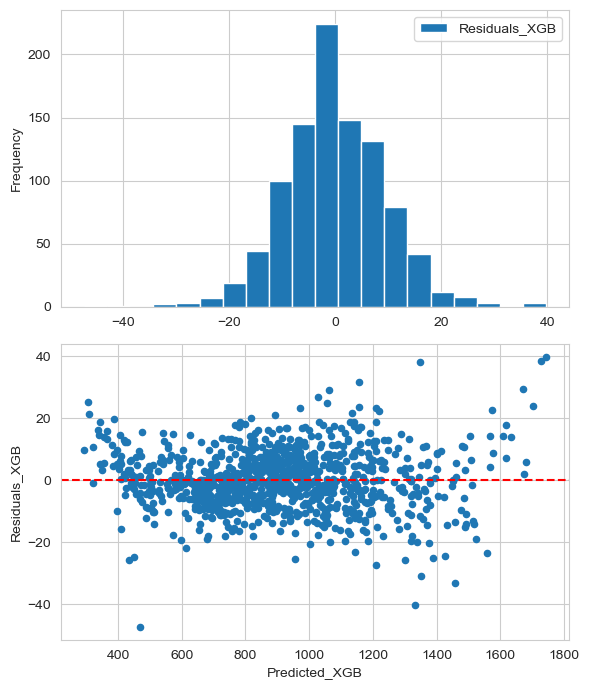

In [403]:
fig, ((g1), (g2)) = plt.subplots(2, 1, figsize = (6,7))
data.plot(y = "Residuals_XGB", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_XGB", y = "Residuals_XGB", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
fig.tight_layout()
plt.show()

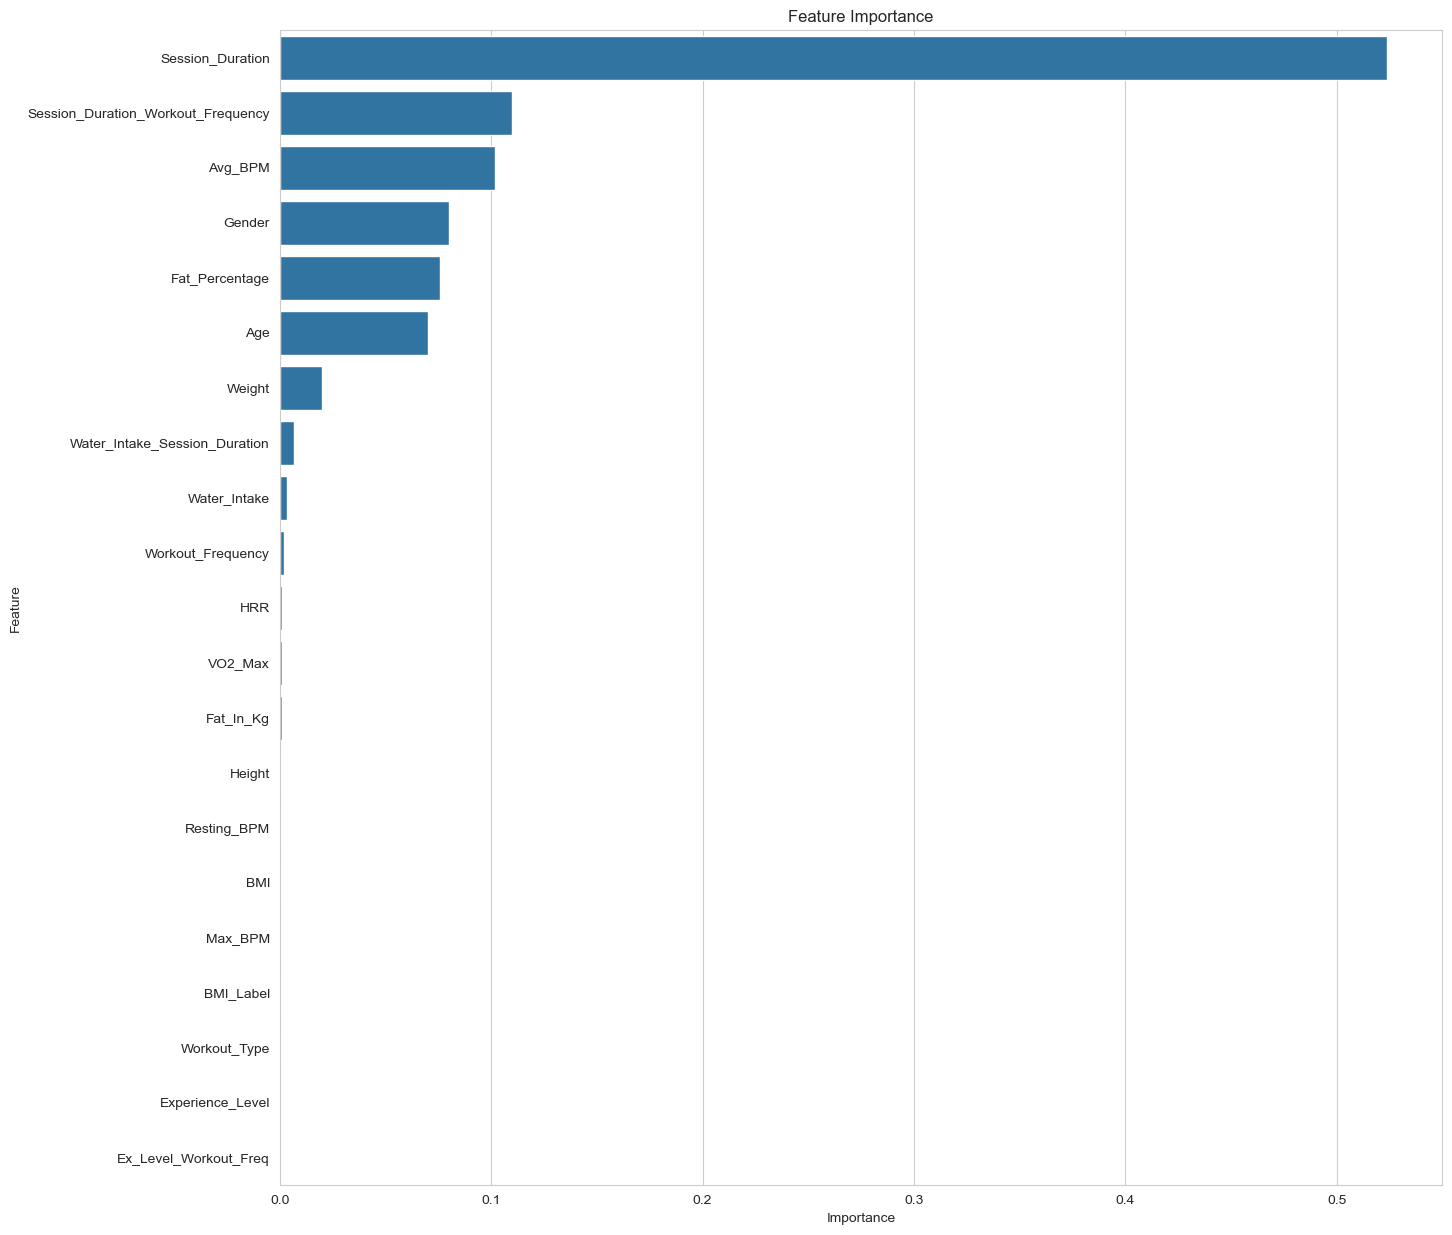

In [404]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(figsize = (15, 15))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

In [405]:
feature_importances[feature_importances["Importance"] > 0.05]

Feature  Importance
0                     Session_Duration    0.523794
20  Session_Duration_Workout_Frequency    0.109847
2                              Avg_BPM    0.101614
9                               Gender    0.079920
1                       Fat_Percentage    0.075829
4                                  Age    0.070168

In [406]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800],
    'max_depth': [2, 3, 4, 5,6,7,None],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [2,4,6,8,10, 12, 14, 16],
    'lambda': [1, 2, 3, 4, 5.0, 6.0, 7.0], 
    'alpha': [1, 2, 3, 4, 5.0, 6.0, 7.0]   
}

X = data_pom[[ "Session_Duration", "Session_Duration_Workout_Frequency", "Avg_BPM", "Gender", "Fat_Percentage", "Age"]]
y = data_pom['Calories_Burned']

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X, y)

best_xgb_model = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)

train_mse_scores, test_mse_scores = [], []
train_rse_scores, test_rse_scores = [], []
train_mae_scores, test_mae_scores = [], []
train_rmse_scores, test_rmse_scores = [], []
train_r2_scores, test_r2_scores = [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_xgb_model.fit(X_train, y_train)
    train_predictions = best_xgb_model.predict(X_train)
    test_predictions = best_xgb_model.predict(X_test)

    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)

    train_rse = calculate_rse(y_train, train_predictions)
    test_rse = calculate_rse(y_test, test_predictions)
    train_rse_scores.append(train_rse)
    test_rse_scores.append(test_rse)

    train_mae = mean_absolute_error(y_train, train_predictions)
    test_mae = mean_absolute_error(y_test, test_predictions)
    train_mae_scores.append(train_mae)
    test_mae_scores.append(test_mae)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_rmse_scores.append(train_rmse)
    test_rmse_scores.append(test_rmse)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({
    "Metric": ["Train_MSE", "Test_MSE", "Train_RMSE", "Test_RMSE", "Train_MAE", "Test_MAE", "Train_R2", "Test_R2", "Train_RSE", "Test_RSE"],
    "Mean": [
        np.mean(train_mse_scores),
        np.mean(test_mse_scores),
        np.mean(train_rmse_scores),
        np.mean(test_rmse_scores),
        np.mean(train_mae_scores),
        np.mean(test_mae_scores),
        np.mean(train_r2_scores),
        np.mean(test_r2_scores),
        np.mean(train_rse_scores),
        np.mean(test_rse_scores)
    ],
    "Std": [
        np.std(train_mse_scores),
        np.std(test_mse_scores),
        np.std(train_rmse_scores),
        np.std(test_rmse_scores),
        np.std(train_mae_scores),
        np.std(test_mae_scores),
        np.std(train_r2_scores),
        np.std(test_r2_scores),
        np.std(train_rse_scores),
        np.std(test_rse_scores)
    ]
})

print(results_df)



Best parameters: {'subsample': 0.6, 'n_estimators': 700, 'min_child_weight': 12, 'max_depth': 2, 'learning_rate': 0.05, 'lambda': 3, 'colsample_bytree': 1.0, 'alpha': 1}
       Metric        Mean        Std
0   Train_MSE   83.271416   4.348662
1    Test_MSE  179.421567  43.240377
2  Train_RMSE    9.122136   0.240930
3   Test_RMSE   13.303616   1.560568
4   Train_MAE    7.065970   0.239576
5    Test_MAE    9.976807   0.993731
6    Train_R2    0.998879   0.000048
7     Test_R2    0.997586   0.000554
8   Train_RSE    9.128001   0.241083
9    Test_RSE   13.337925   1.564539


In [407]:
best_xgb_model.fit(X, y)
data["Predicted_XGB"] = best_xgb_model.predict(X)
data["Residuals_XGB"] = data["Calories_Burned"] - data["Predicted_XGB"]
std_residuals = data["Residuals_XGB"].std()
data["Std_Residuals_XGB"] = data["Residuals_XGB"] / std_residuals
data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1    88.3    1.71      180      157           60   
1     46       0    74.9    1.53      179      151           66   
2     32       0    68.1    1.66      167      122           54   
3     25       1    53.2    1.70      190      164           56   
4     38       1    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24       1    87.1    1.74      187      158           67   
969   25       1    66.6    1.61      184      166           56   
970   59       0    60.4    1.76      194      120           53   
971   32       1   126.4    1.83      198      146           62   
972   46       1    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned  Workout_Type  ...  Fat_In_Kg  \
0                1.69           1313.0             3  ...    11.1258   
1                1.30            883.0             1  ...    25.3911   
2                1.11            677.0             0  ...    22.7454   
3                0.59            532.0             2  ...    15.3216   
4                0.64            556.0             2  ...    13.4612   
..                ...              ...           ...  ...        ...   
968              1.57           1364.0             2  ...     8.7100   
969              1.38           1260.0             2  ...    16.6500   
970              1.72            929.0             0  ...    11.3552   
971              1.10            883.0             1  ...    35.6448   
972              0.75            542.0             2  ...    25.5456   

     BMI_Label  Session_Duration_Workout_Frequency    Predicted   Residuals  \
0            1                                6.76  1342.779120  -29.779120   
1            1                                5.20   926.891214  -43.891214   
2            0                                4.44   624.228192   52.771808   
3            3                                1.77   545.352259  -13.352259   
4            3                                1.92   568.662794  -12.662794   
..         ...                                 ...          ...         ...   
968          2                                6.28  1273.296067   90.703933   
969          2                                2.76  1160.147458   99.852542   
970          0                                8.60  1074.123184 -145.123184   
971          1                                3.30   781.673953  101.326047   
972          1                                1.50   603.132958  -61.132958   

     Std_Residuals  Calories_Burned_SQRT  Predicted_XGB  Residuals_XGB  \
0        -0.558178             36.235342    1309.335571       3.664429   
1        -0.646467             29.715316     890.838928      -7.838928   
2         0.758985             26.019224     676.819031       0.180969   
3        -0.282264             23.065125     534.345398      -2.345398   
4        -0.235008             23.579652     575.879150     -19.879150   
..             ...                   ...            ...            ...   
968       1.364458             36.932371    1370.075439      -6.075439   
969       1.240036             35.496479    1248.776367      11.223633   
970      -1.940721             30.479501     917.066284      11.933716   
971       1.929249             29.715316     881.033325       1.966675   
972      -1.169329             23.280893     534.333191       7.666809   

     Std_Residuals_XGB  
0             0.435347  
1            -0.931292  
2             0.021500  
3            -0.278642  
4            -2.361713  
..                 ...  
968          -0.721784  
969           1.333407  
970           1.417767  
971           0.233648  
972           0.910844  

[973 rows x 29 columns]

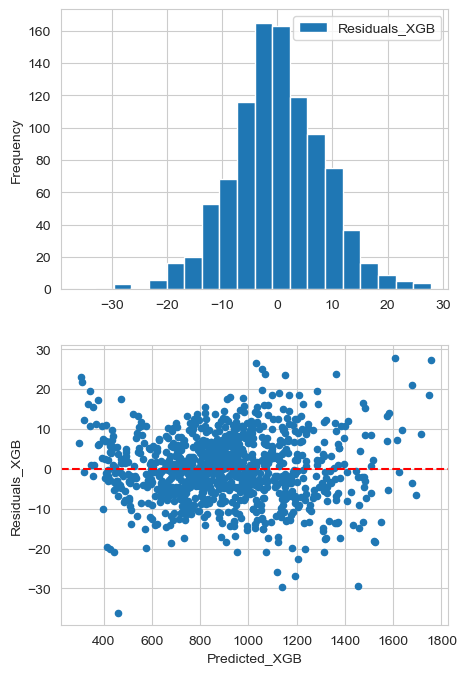

In [408]:
fig, ((g1), (g2)) = plt.subplots(2,1, figsize = (5,8))
data.plot(y = "Residuals_XGB", kind = "hist", bins = 20, ax = g1)
data.plot(x = "Predicted_XGB", y = "Residuals_XGB", kind = "scatter", ax = g2)
g2.axhline(y = 0, c = "red", linestyle = "dashed")
plt.show()


In [410]:
raw_data

Age  Gender  Weight  Height  Max_BPM  Avg_BPM  Resting_BPM  \
0     56    Male    88.3    1.71      180      157           60   
1     46  Female    74.9    1.53      179      151           66   
2     32  Female    68.1    1.66      167      122           54   
3     25    Male    53.2    1.70      190      164           56   
4     38    Male    46.1    1.79      188      158           68   
..   ...     ...     ...     ...      ...      ...          ...   
968   24    Male    87.1    1.74      187      158           67   
969   25    Male    66.6    1.61      184      166           56   
970   59  Female    60.4    1.76      194      120           53   
971   32    Male   126.4    1.83      198      146           62   
972   46    Male    88.7    1.63      166      146           66   

     Session_Duration  Calories_Burned Workout_Type  ...  Workout_Frequency  \
0                1.69           1313.0         Yoga  ...                  4   
1                1.30            883.0         HIIT  ...                  4   
2                1.11            677.0       Cardio  ...                  4   
3                0.59            532.0     Strength  ...                  3   
4                0.64            556.0     Strength  ...                  3   
..                ...              ...          ...  ...                ...   
968              1.57           1364.0     Strength  ...                  4   
969              1.38           1260.0     Strength  ...                  2   
970              1.72            929.0       Cardio  ...                  5   
971              1.10            883.0         HIIT  ...                  3   
972              0.75            542.0     Strength  ...                  2   

     Experience_Level    BMI  Ex_Level_Workout_Freq    VO2_Max  HRR  \
0                   3  30.20                     12  45.900000  120   
1                   2  32.00                      8  41.495455  113   
2                   2  24.71                      8  47.316667  113   
3                   1  18.41                      3  51.910714  134   
4                   1  14.39                      3  42.300000  120   
..                ...    ...                    ...        ...  ...   
968                 3  28.77                     12  42.702985  120   
969                 1  25.69                      2  50.271429  128   
970                 3  19.50                     15  56.003774  141   
971                 2  37.74                      6  48.861290  136   
972                 1  33.38                      2  38.481818  100   

     Water_Intake_Session_Duration  Fat_In_Kg      BMI_Label  \
0                         2.071006    11.1258          Obese   
1                         1.615385    25.3911          Obese   
2                         2.072072    22.7454  Normal weight   
3                         3.559322    15.3216    Underweight   
4                         4.375000    13.4612    Underweight   
..                             ...        ...            ...   
968                       2.229299     8.7100     Overweight   
969                       2.173913    16.6500     Overweight   
970                       1.569767    11.3552  Normal weight   
971                       1.909091    35.6448          Obese   
972                       4.666667    25.5456          Obese   

     Session_Duration_Workout_Frequency  
0                                  6.76  
1                                  5.20  
2                                  4.44  
3                                  1.77  
4                                  1.92  
..                                  ...  
968                                6.28  
969                                2.76  
970                                8.60  
971                                3.30  
972                                1.50  

[973 rows x 22 columns]

In [411]:
numeric_features = ['Session_Duration', 'Session_Duration_Workout_Frequency', 'Avg_BPM', 'Fat_Percentage', "Age"]
categorical_features = ["Gender"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

final_xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('xgboost', random_search.best_estimator_)  
])

X = raw_data[["Session_Duration", "Avg_BPM", "Fat_Percentage", "Age", "Gender"]]
y = raw_data['Calories_Burned']
X["Session_Duration_Workout_Frequency"] = raw_data["Session_Duration"] * raw_data["Workout_Frequency"]

final_xgb_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Session_Duration',
                                                   'Session_Duration_Workout_Frequency',
                                                   'Avg_BPM', 'Fat_Percentage',
                                                   'Age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender'])])),
                ('xgboost',
                 XGBRegressor(alpha=1, base_score=None, booster=None,
                              callbacks=None, colsample_bylevel=None,
                              colsample_bynode=None, colsample_b...
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, lambda=3,
                              learning_rate=0.05, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=2, max_leaves=None,
                              min_child_weight=12, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=700, n_jobs=None, ...))])

In [412]:
with open('model.pkl', 'wb') as f:
    pickle.dump(final_xgb_model, f)
print("Model saved")

Model saved


In [413]:
data_pred = {
    "Session_Duration": [1.69],
    "Session_Duration_Workout_Frequency": [6.76],
    "Avg_BPM": [157],
    "Fat_Percentage": [12.6],
    "Age": [56],
    "Gender": ["Male"]
}

df = pd.DataFrame(data_pred)
df

Session_Duration  Session_Duration_Workout_Frequency  Avg_BPM  \
0              1.69                                6.76      157   

   Fat_Percentage  Age Gender  
0            12.6   56   Male

In [414]:
prediction = final_xgb_model.predict(df)
prediction

array([1309.3356], dtype=float32)